# SVM

classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")
# pip install --upgrade tensorflow

In [3]:
data = pd.read_csv(r"forestfires.csv")
print("data Shape:",data.shape)
data.tail()

data Shape: (517, 31)


month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[5 rows x 31 columns]

### EDA and Data Visualization

In [4]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print('\nNumber of unique duplicates:', len(data[data.duplicated()]));   print(data[data.duplicated()].value_counts())
# duplicate_counts = data[data.duplicated()].value_counts().reset_index(name='Count')['Count']
data=data.drop_duplicates();  print("data Shape:",data.shape)


 Describe:
             FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    

## Variable check

### Find columns with the same values

In [5]:
# Find columns with the same values
columns_with_same_values = data.columns[data.nunique() == 1].tolist()

for column in columns_with_same_values:
    unique_values = data[column].unique()
    print(f"Unique values in the '{column}' column:")
    print(unique_values)
    print()

# excluding columns_with_same_values
data = data.drop(columns=columns_with_same_values)
print("excluded columns_with_same_values, nos:",columns_with_same_values ,",Final shape:", data.shape)

excluded columns_with_same_values, nos: [] ,Final shape: (509, 31)


In [6]:
# Discrete Variables Count
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
print(discrete_feature)

# Continuous Feature Count
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('\nContinuous Feature Count {}'.format(len(continuous_feature)))
print(continuous_feature)

# Other Features Count
other_feature = [feature for feature in data.columns if feature not in discrete_feature and feature not in continuous_feature]
print('\nOther Features Count: {}'.format(len(other_feature)))
print('Other Features: {}'.format(other_feature))

# Numeric Data
numeric_data = data.select_dtypes(include='number')
print('\nNumeric Data Shape:', numeric_data.shape)
print(numeric_data.columns)

# Categorical Data
categorical_data = data.select_dtypes(include='object')
print('\nCategorical Data Shape:', categorical_data.shape)
print('Categorical Columns:', categorical_data.columns)

Discrete Variables Count: 23
['month', 'day', 'rain', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep', 'size_category']

Continuous Feature Count 8
['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']

Other Features Count: 0
Other Features: []

Numeric Data Shape: (509, 28)
Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
      dtype='object')

Categorical Data Shape: (509, 3)
Categorical Columns: Index(['month', 'day', 'size_category'], dtype='object')


## Categorical Data

Bar plot for all categorical

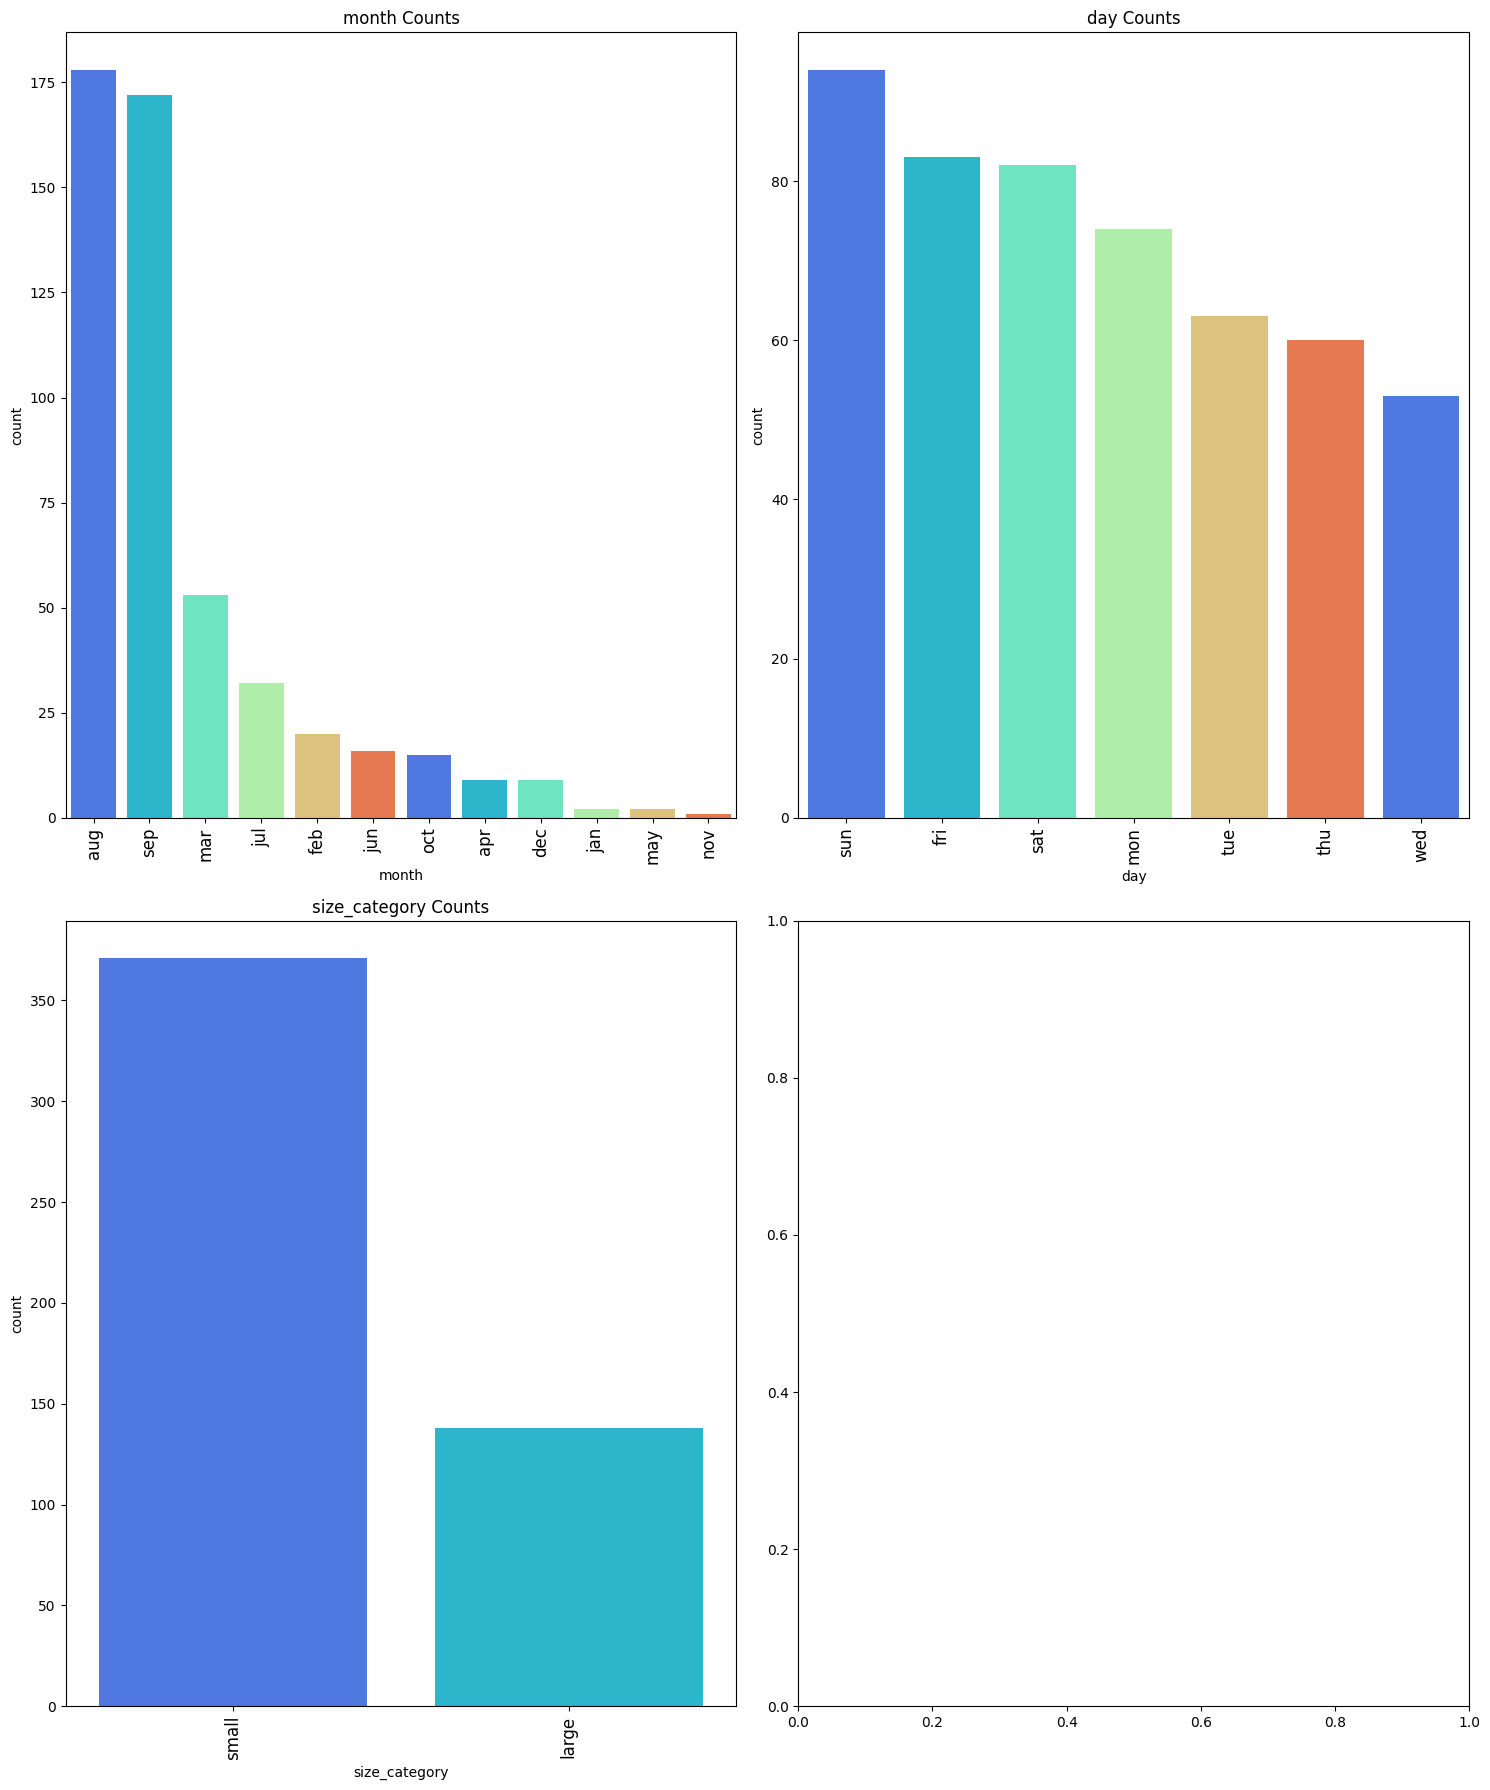

In [7]:
num_columns = len(categorical_data.columns)
num_rows = num_columns // 2 + num_columns % 2  # Ensure odd number of columns works correctly
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 9))

pal = sns.color_palette('rainbow')
for i, column in enumerate(categorical_data.columns):
    row_index = i // 2
    col_index = i % 2
    
    sns.countplot(x=column, data=categorical_data, palette=pal,
                  order=categorical_data[column].value_counts().index,
                  ax=axes[row_index, col_index])
    
    axes[row_index, col_index].set_xticklabels(axes[row_index, col_index].get_xticklabels(), rotation=90, fontsize=12)
    axes[row_index, col_index].set_title(f'{column} Counts')

# Adjust layout
plt.tight_layout()
plt.show()


### Labelencoder to convert categorical data into numeric

In [8]:
cat_data = categorical_data.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_data.columns:
    cat_data[column] = label_encoder.fit_transform(cat_data[column])
    
    print(f"\nLabel Encoding for {column}:")
    # print("\n", cat_data[column].value_counts())
    unique_values = categorical_data[column].unique()

    for value in unique_values:
        label = label_encoder.transform([value])[0]
        counts = cat_data[column].value_counts()[label]
        print(f"Value: {value} -> Label: {label} --> Counts: {counts}")
    


Label Encoding for month:
Value: mar -> Label: 7 --> Counts: 53
Value: oct -> Label: 10 --> Counts: 15
Value: aug -> Label: 1 --> Counts: 178
Value: sep -> Label: 11 --> Counts: 172
Value: apr -> Label: 0 --> Counts: 9
Value: jun -> Label: 6 --> Counts: 16
Value: jul -> Label: 5 --> Counts: 32
Value: feb -> Label: 3 --> Counts: 20
Value: jan -> Label: 4 --> Counts: 2
Value: dec -> Label: 2 --> Counts: 9
Value: may -> Label: 8 --> Counts: 2
Value: nov -> Label: 9 --> Counts: 1

Label Encoding for day:
Value: fri -> Label: 0 --> Counts: 83
Value: tue -> Label: 5 --> Counts: 63
Value: sat -> Label: 2 --> Counts: 82
Value: sun -> Label: 3 --> Counts: 94
Value: mon -> Label: 1 --> Counts: 74
Value: wed -> Label: 6 --> Counts: 53
Value: thu -> Label: 4 --> Counts: 60

Label Encoding for size_category:
Value: small -> Label: 1 --> Counts: 371
Value: large -> Label: 0 --> Counts: 138


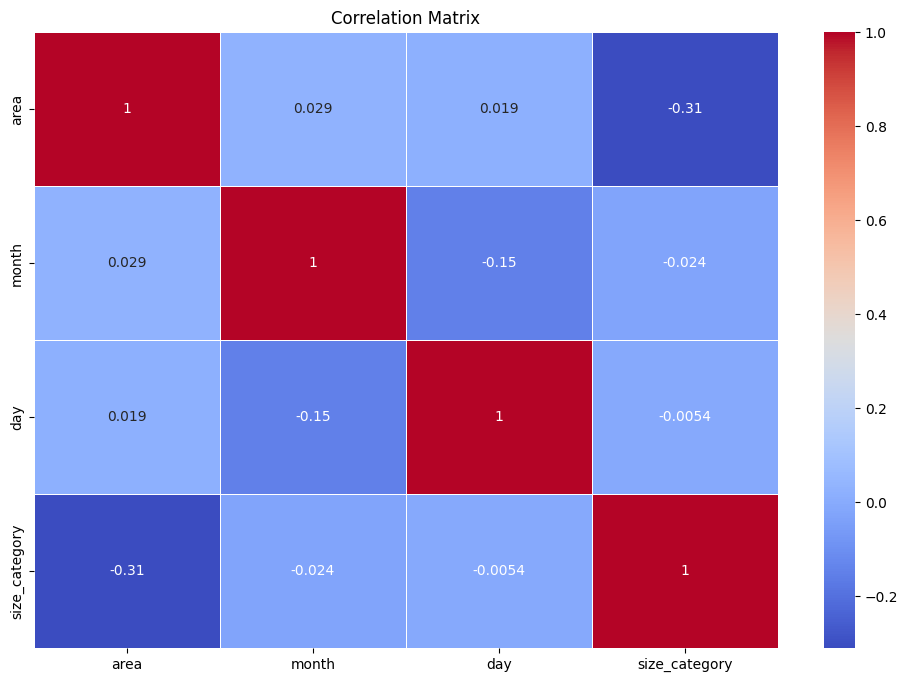

In [9]:
# Correlation Plot
cat_data=pd.concat([numeric_data['area'],cat_data],axis=1)
corr_matrix = cat_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Count Plot

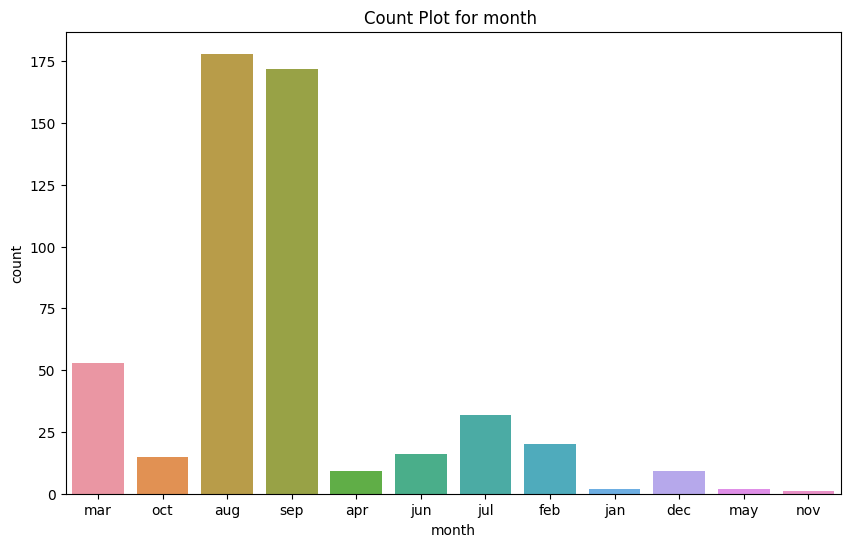

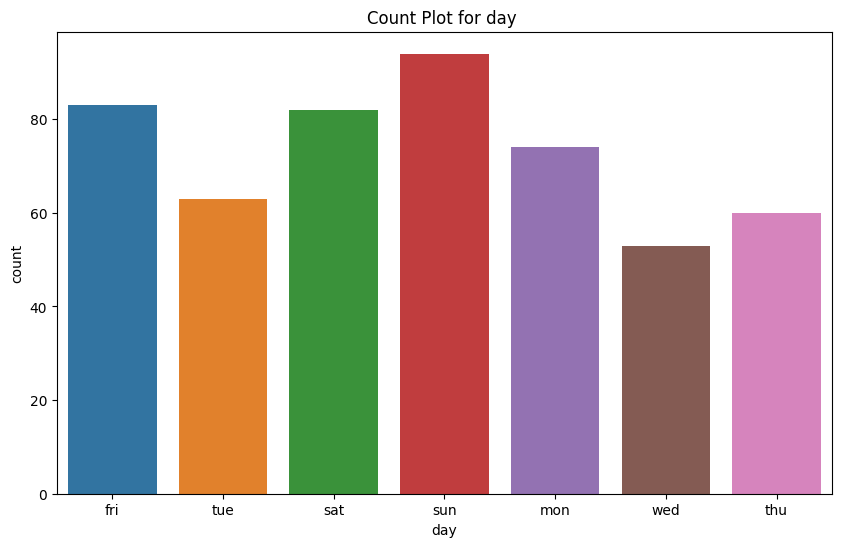

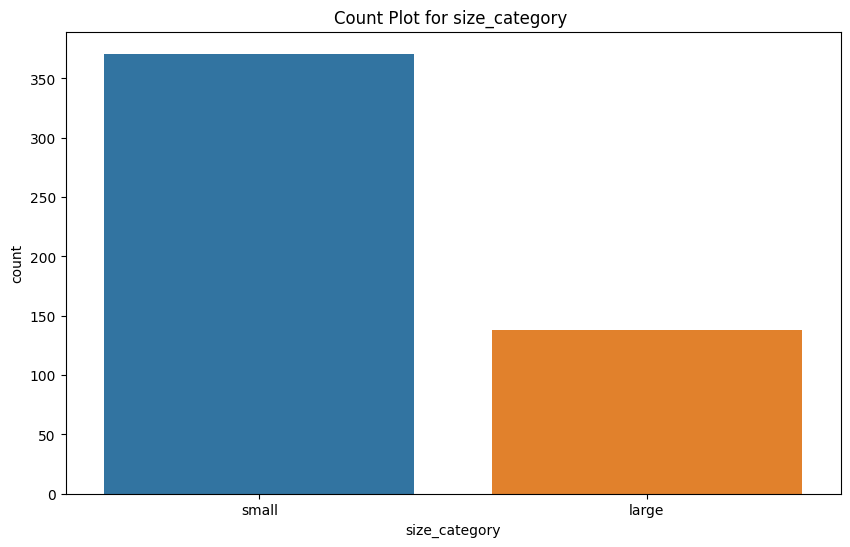

In [10]:
categorical_columns = categorical_data.columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=categorical_data, x=column)
    plt.title(f'Count Plot for {column} ')
    plt.show()

## Numeric Data

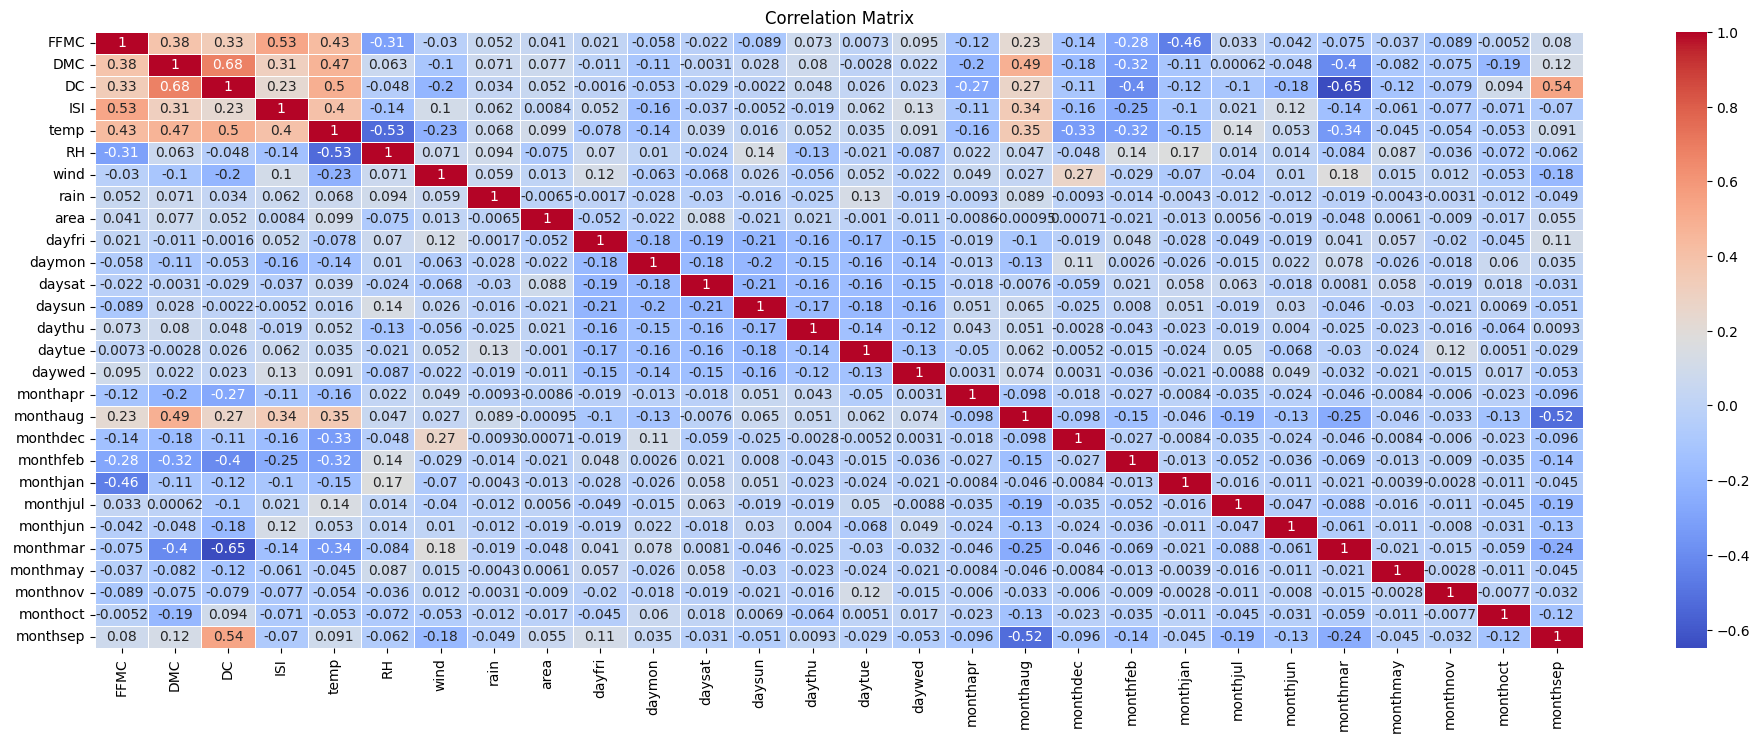

In [11]:
# Correlation Plot
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(24, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

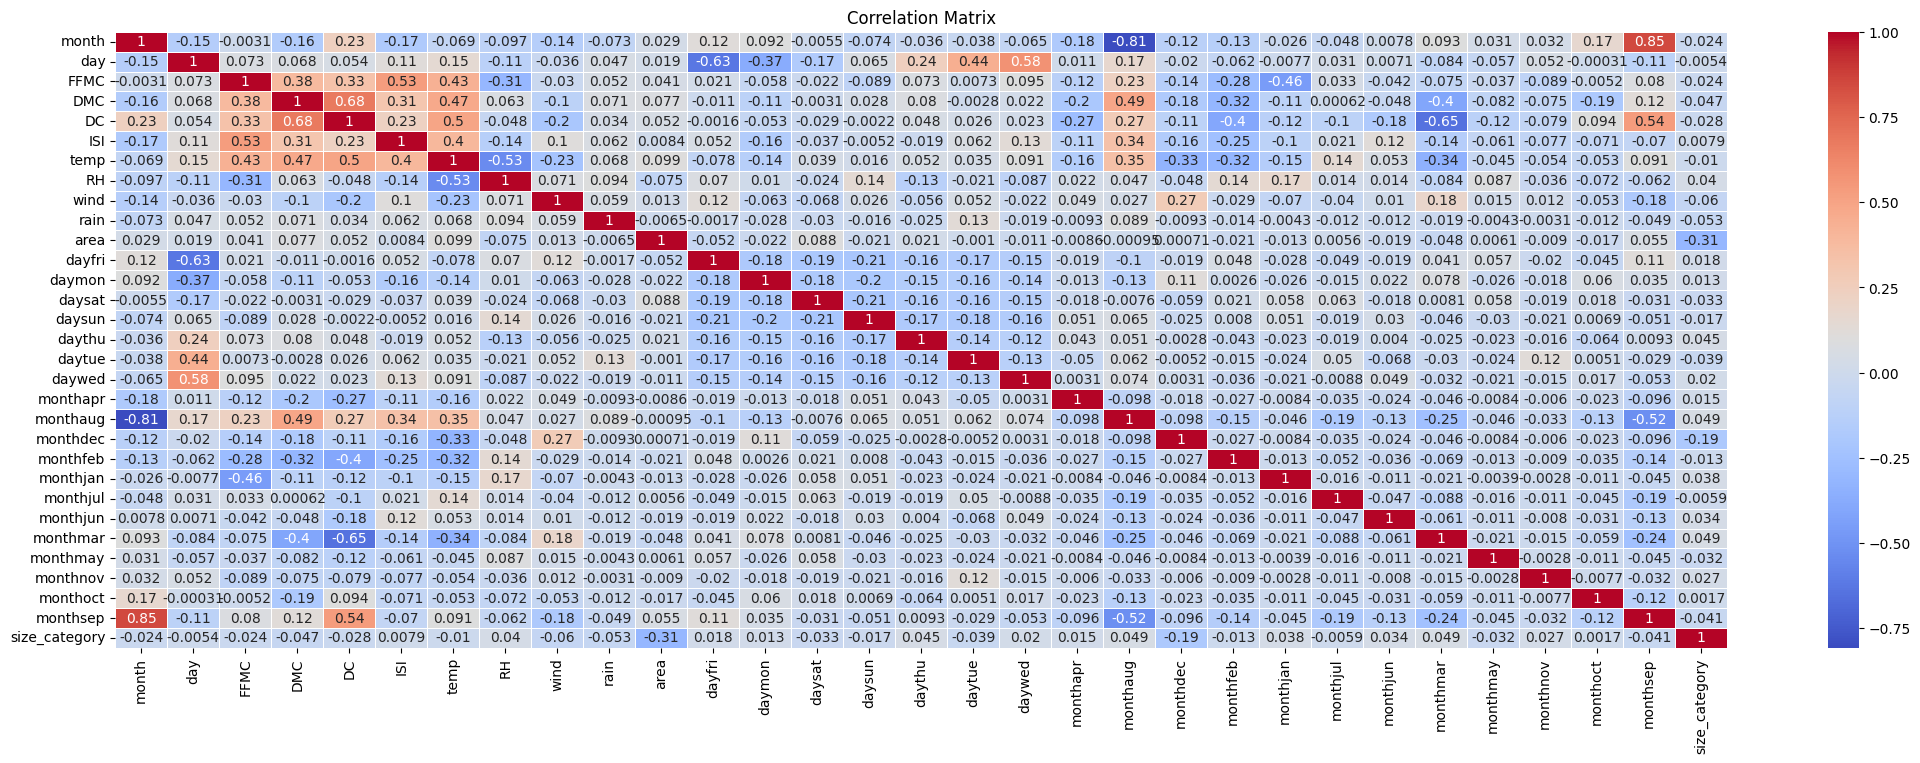

In [12]:
# # Correlation Plot with All variable
data_2 = data.copy()
data_2[categorical_data.columns]=cat_data[categorical_data.columns]
corr_matrix = data_2.corr(numeric_only=True)
plt.figure(figsize=(26, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### visualization

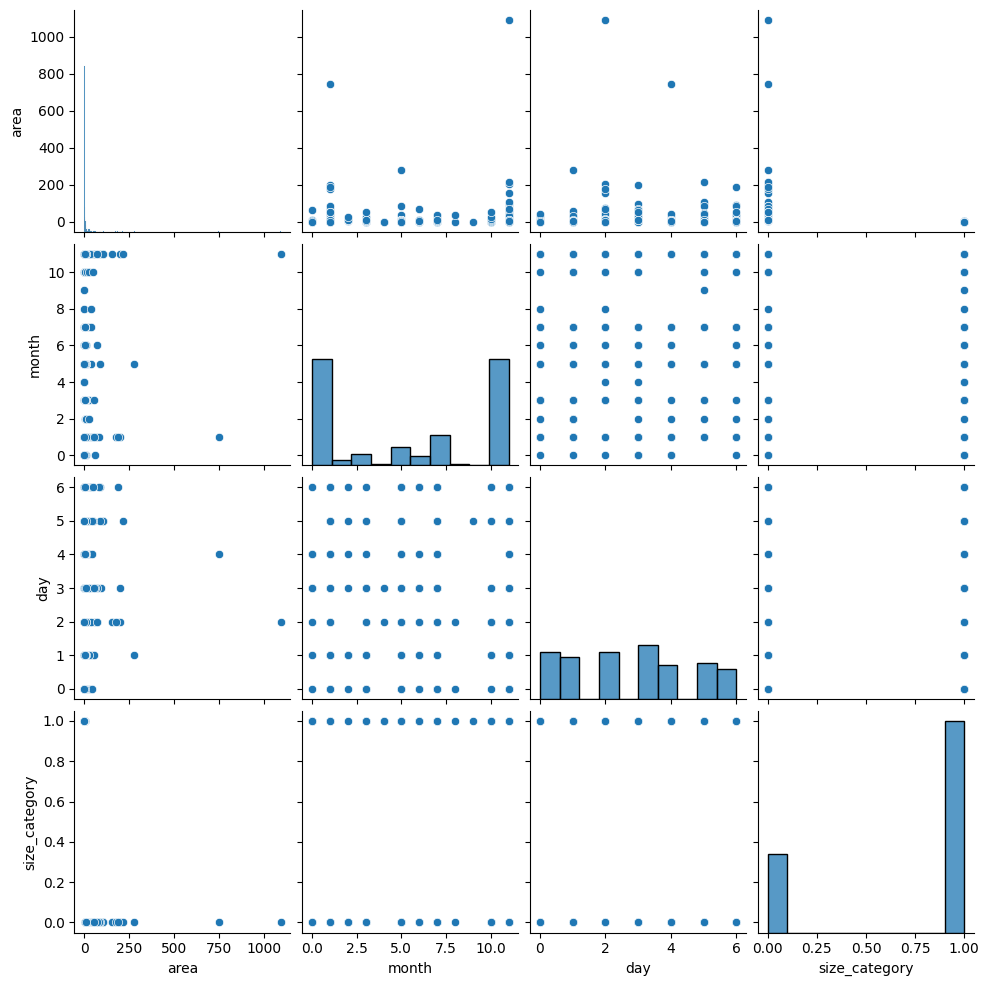

In [13]:
# relationship plot for categorical data
sns.pairplot(data= cat_data)
plt.show()

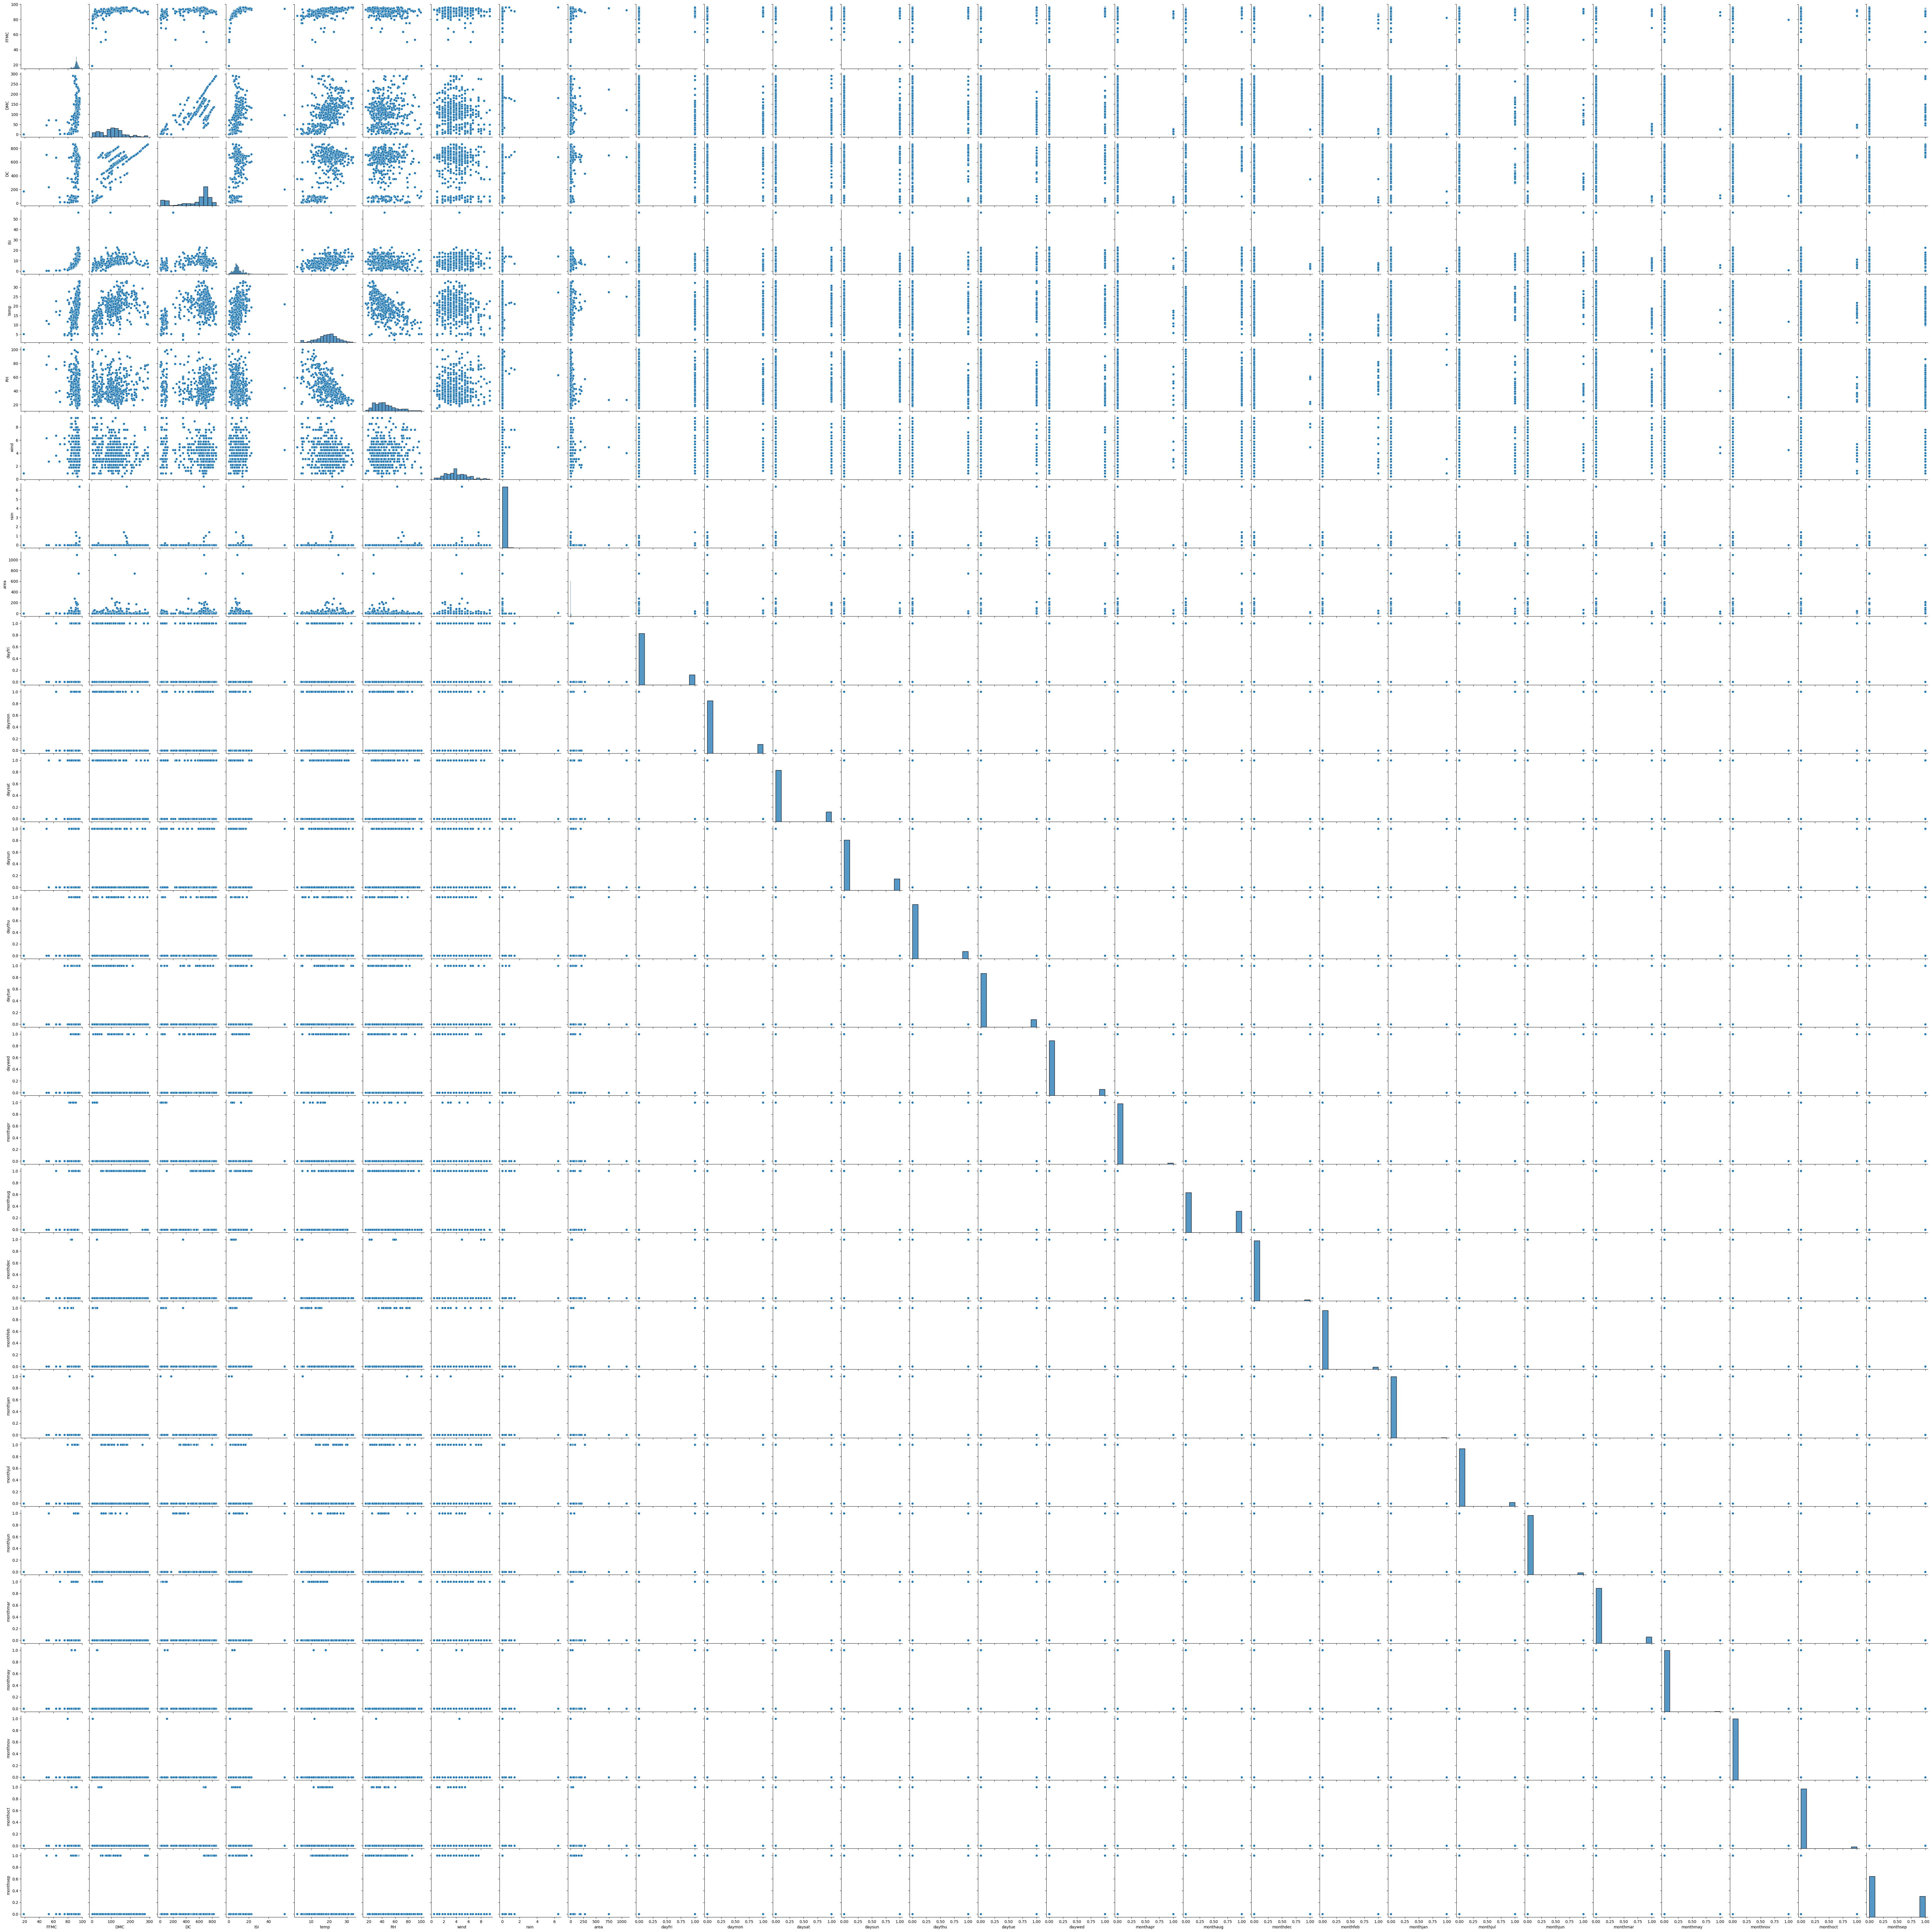

In [14]:
# relationship plot for numeric data
sns.pairplot(data= numeric_data)
plt.show()

### Detect outliers and handle them

In [15]:
data_filtered=data_2
# data_filtered=pd.concat([numeric_data,cat_data],axis=1)    #,cat_data ,numeric_data, data_2
data_filtered.shape

(509, 31)

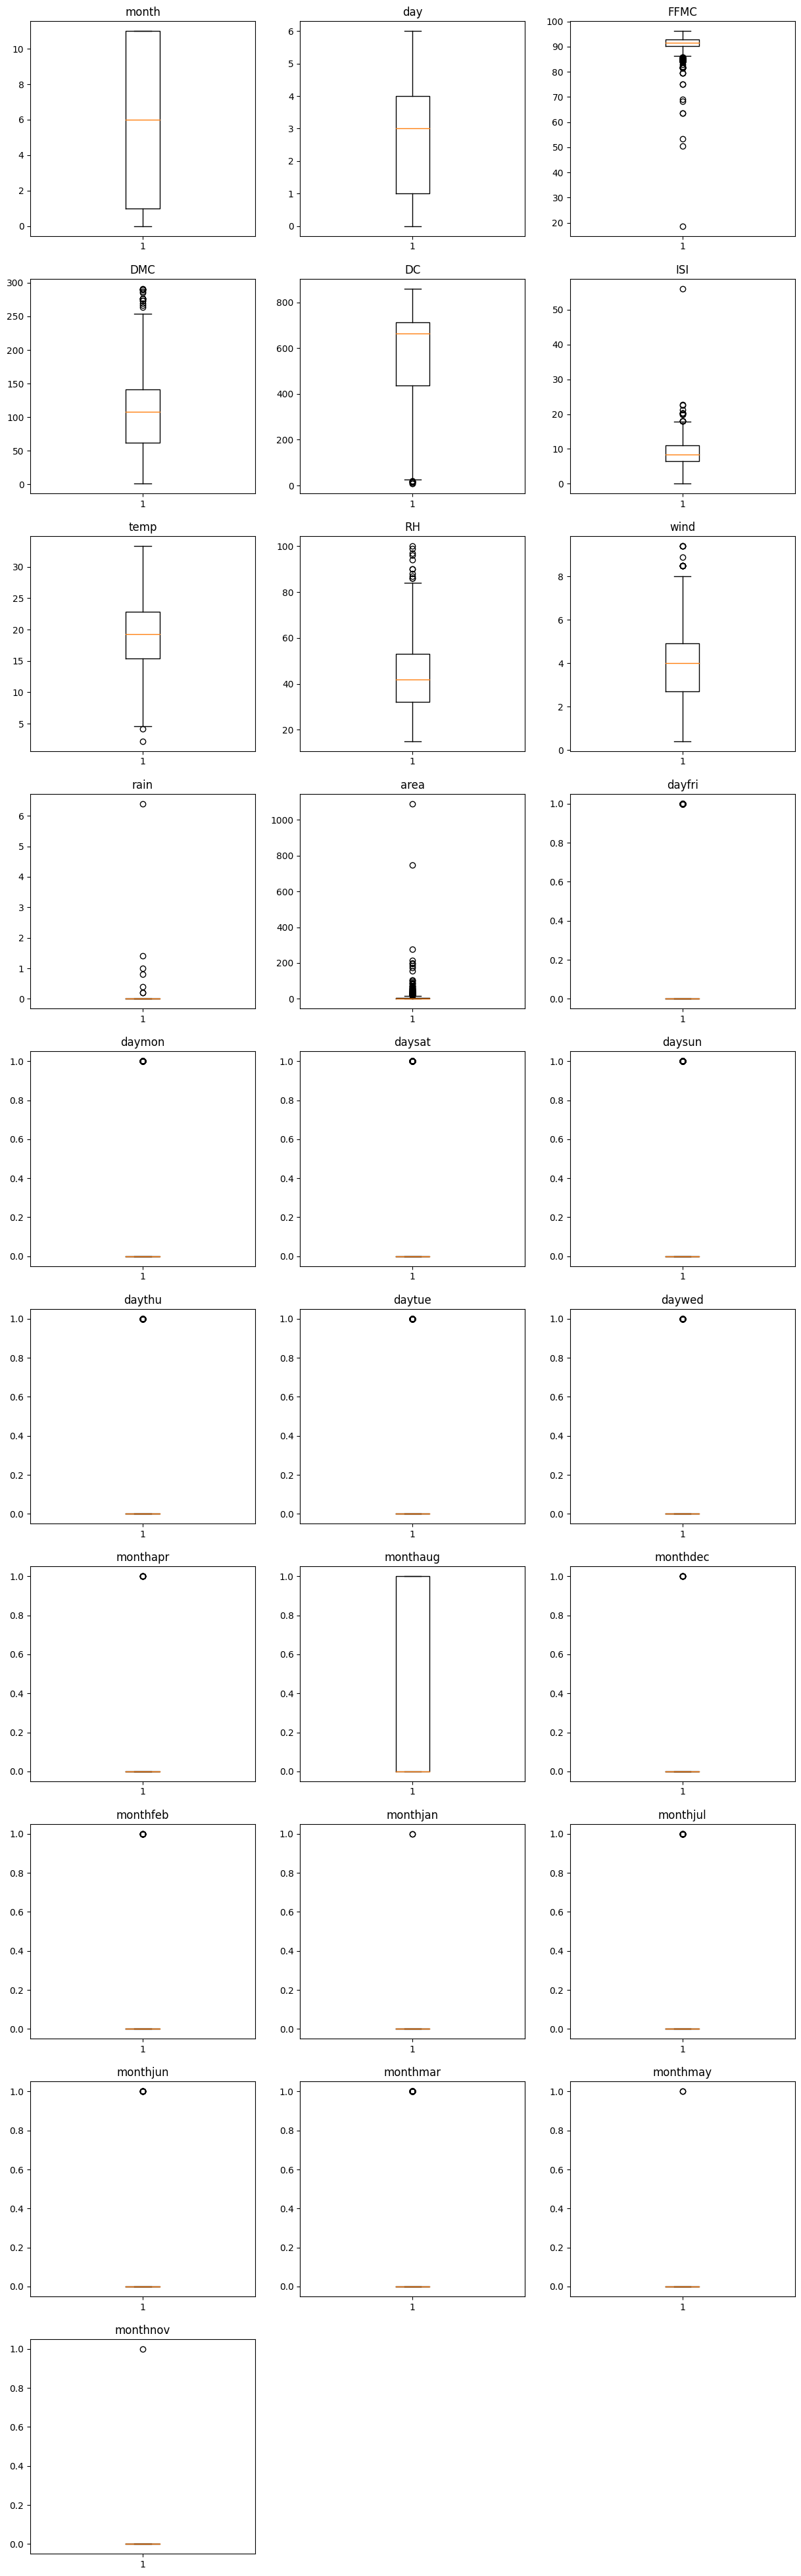

In [16]:
# display boxplots

num_columns = len(numeric_data.columns)
subplots_per_row = 3
num_rows = (num_columns + subplots_per_row - 1) // subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i in range(num_columns):
    ax = axes[i]
    ax.boxplot(data_filtered.iloc[:, i])
    ax.set_title(data_filtered.columns[i])

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


#### Treating outliers with IQR

In [17]:
num_columns = len(numeric_data.columns)
new_data = data_filtered.copy()

for i in range(num_columns):
    # print("\n\nColumn Name:",(data_filtered.columns[i]))
    print("\n\nColumn Name: \033[1;34m" + "\033[1m" + data_filtered.columns[i] + "\033[0m")

    # Calculate the IQR
    Q1 = data_filtered.iloc[:, i].quantile(0.25)
    Q3 = data_filtered.iloc[:, i].quantile(0.75)
    IQR = Q3 - Q1
        
    # Identify and mark outliers using IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(data_filtered[(data_filtered.iloc[:, i] > upper_bound) | (data_filtered.iloc[:, i] < lower_bound)].tail(2))
    
    # # Changing the outliers
    new_data.loc[(new_data[data_filtered.columns[i]] > upper_bound), data_filtered.columns[i]] = upper_bound
    new_data.loc[(new_data[data_filtered.columns[i]] < lower_bound), data_filtered.columns[i]] = lower_bound
    
    # # Drop rows with outliers
    # outliers = new_data[(new_data.iloc[:, i] < lower_bound) | (new_data.iloc[:, i] > upper_bound)].index   
    # new_data = new_data.drop(outliers)
    
print("\nShape of new data:",new_data.shape)
# sns.boxplot(data = new_data)
# plt.show()




Column Name: month
Empty DataFrame
Columns: [month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area, dayfri, daymon, daysat, daysun, daythu, daytue, daywed, monthapr, monthaug, monthdec, monthfeb, monthjan, monthjul, monthjun, monthmar, monthmay, monthnov, monthoct, monthsep, size_category]
Index: []

[0 rows x 31 columns]


Column Name: day
Empty DataFrame
Columns: [month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area, dayfri, daymon, daysat, daysun, daythu, daytue, daywed, monthapr, monthaug, monthdec, monthfeb, monthjan, monthjul, monthjun, monthmar, monthmay, monthnov, monthoct, monthsep, size_category]
Index: []

[0 rows x 31 columns]


Column Name: FFMC
     month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
514      1    3  81.6  56.7  665.6  1.9  21.2  70   6.7   0.0  ...         0   
516      9    5  79.5   3.0  106.7  1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
51

Note: changing outliers is neccessary for this problem, 

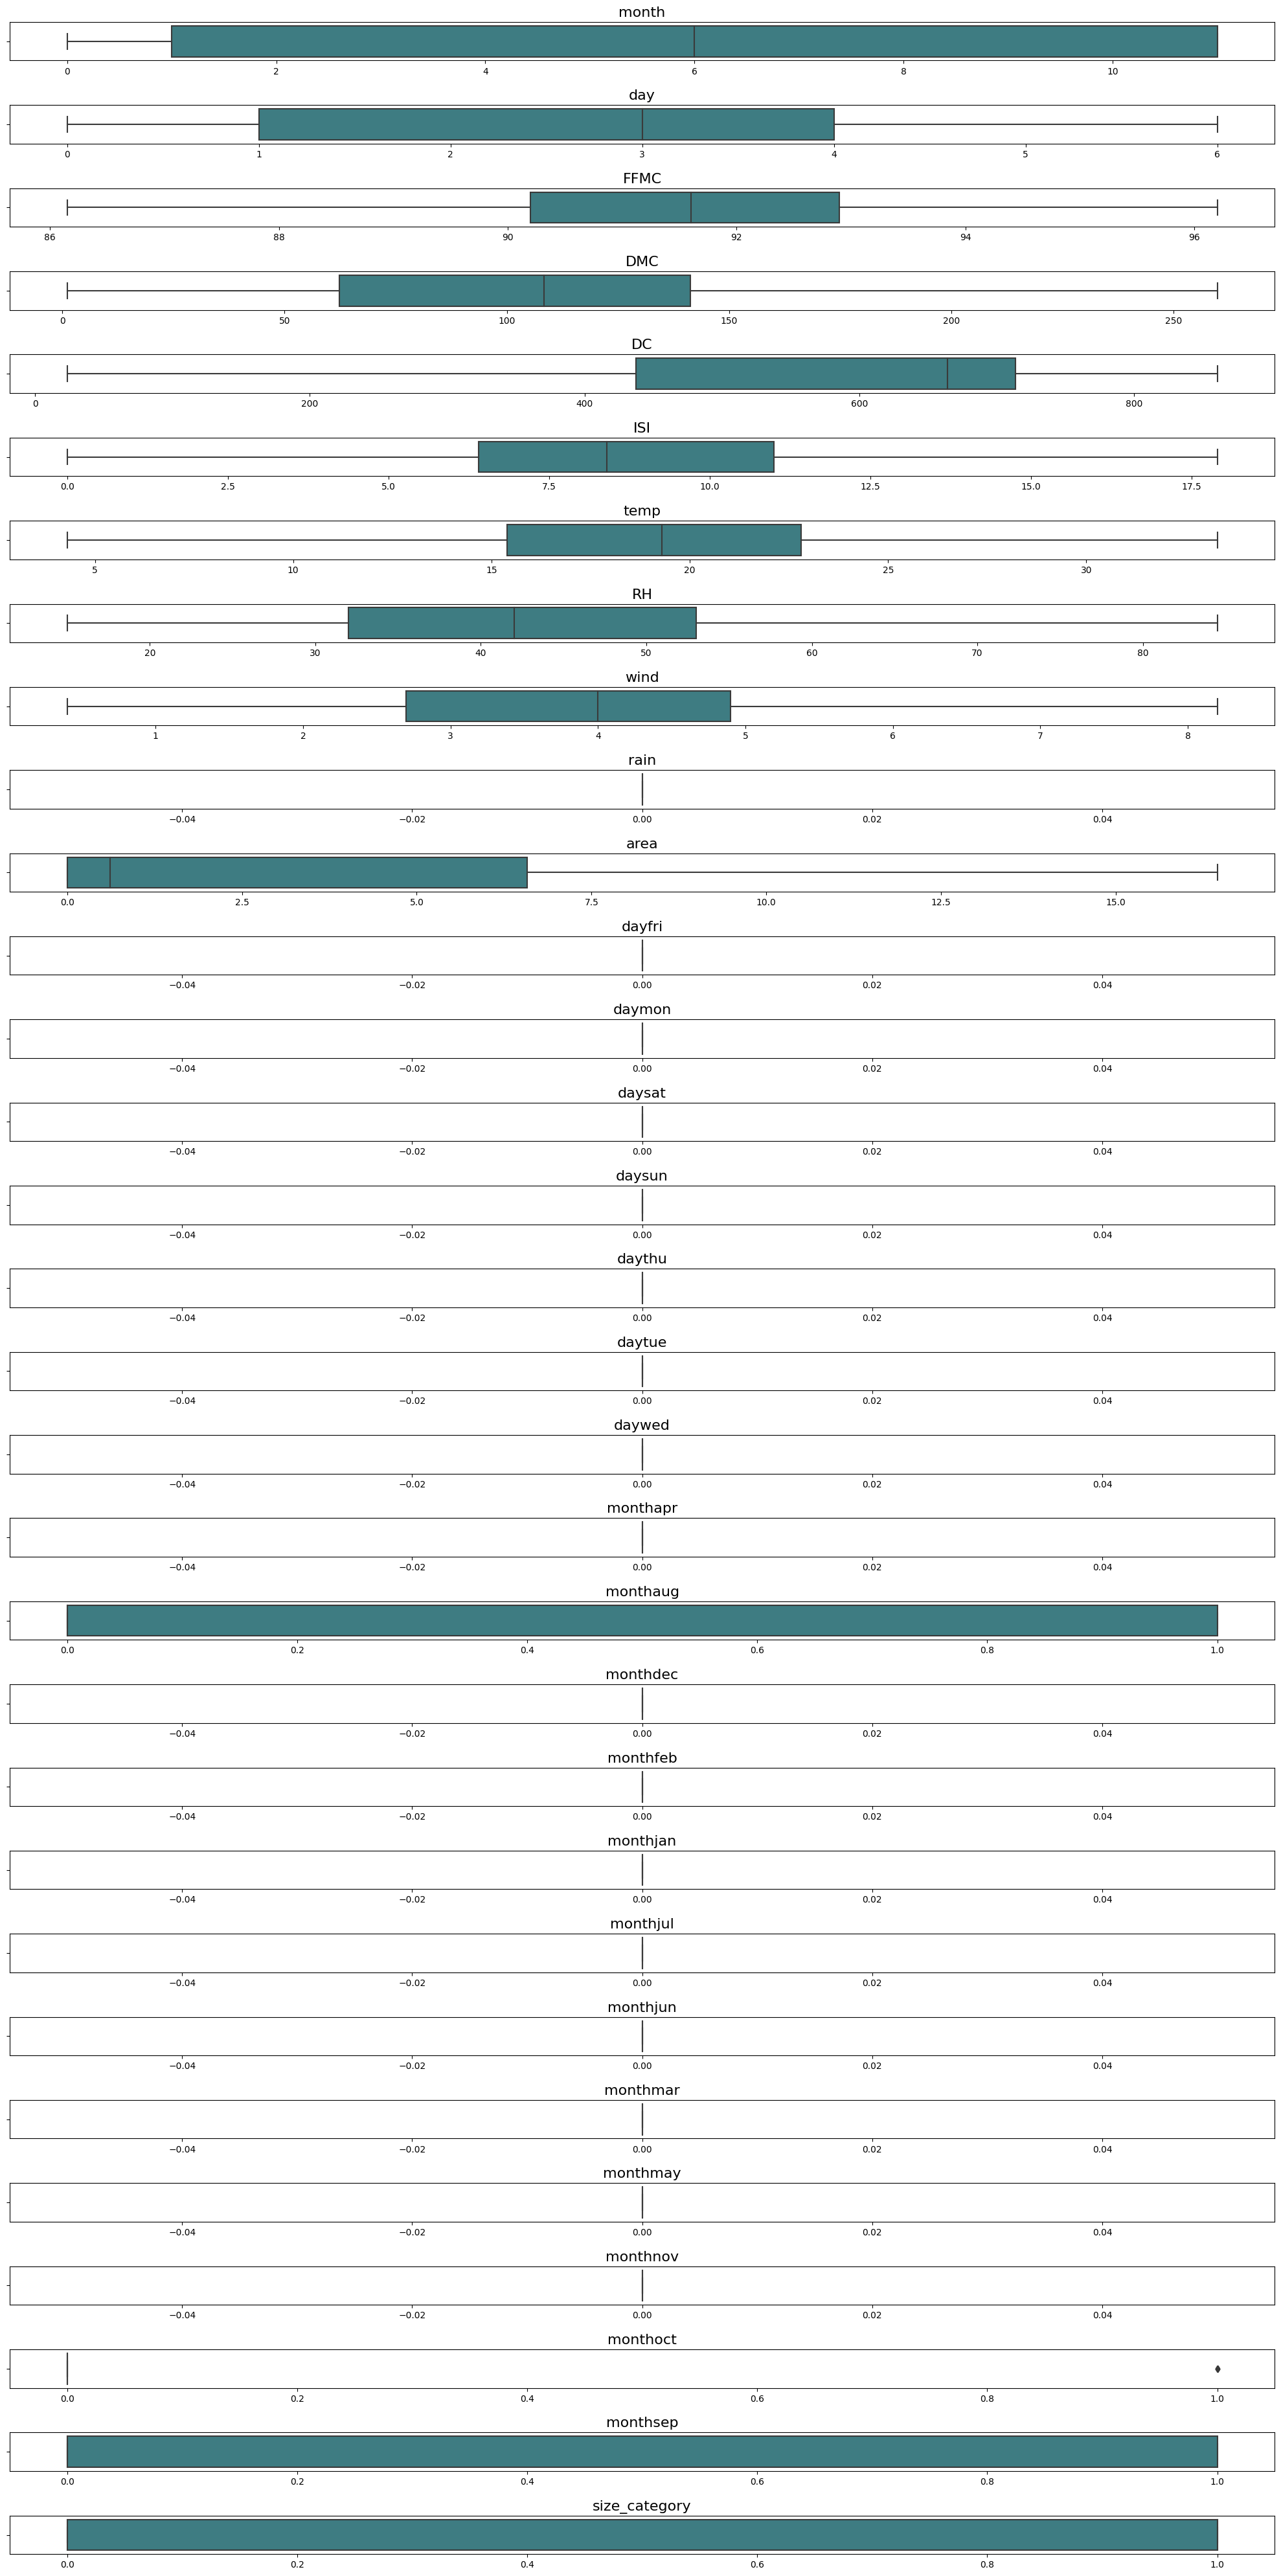

In [18]:
# display boxplots of Treated outliers with IQR

# Display boxplots
# Create subplots
fig, axes = plt.subplots(len(new_data.columns), 1, figsize=(20, 40), sharex=False, sharey=False)

# Loop through each variable and create boxplots
for i, variable in enumerate(new_data):
    sns.boxplot(x=variable, data=new_data, palette='crest', ax=axes[i])
    axes[i].set_title(f'{variable}', fontsize=16) 
    axes[i].set_xlabel('')  

plt.tight_layout(pad=1.5)
plt.show()


### distribution plots

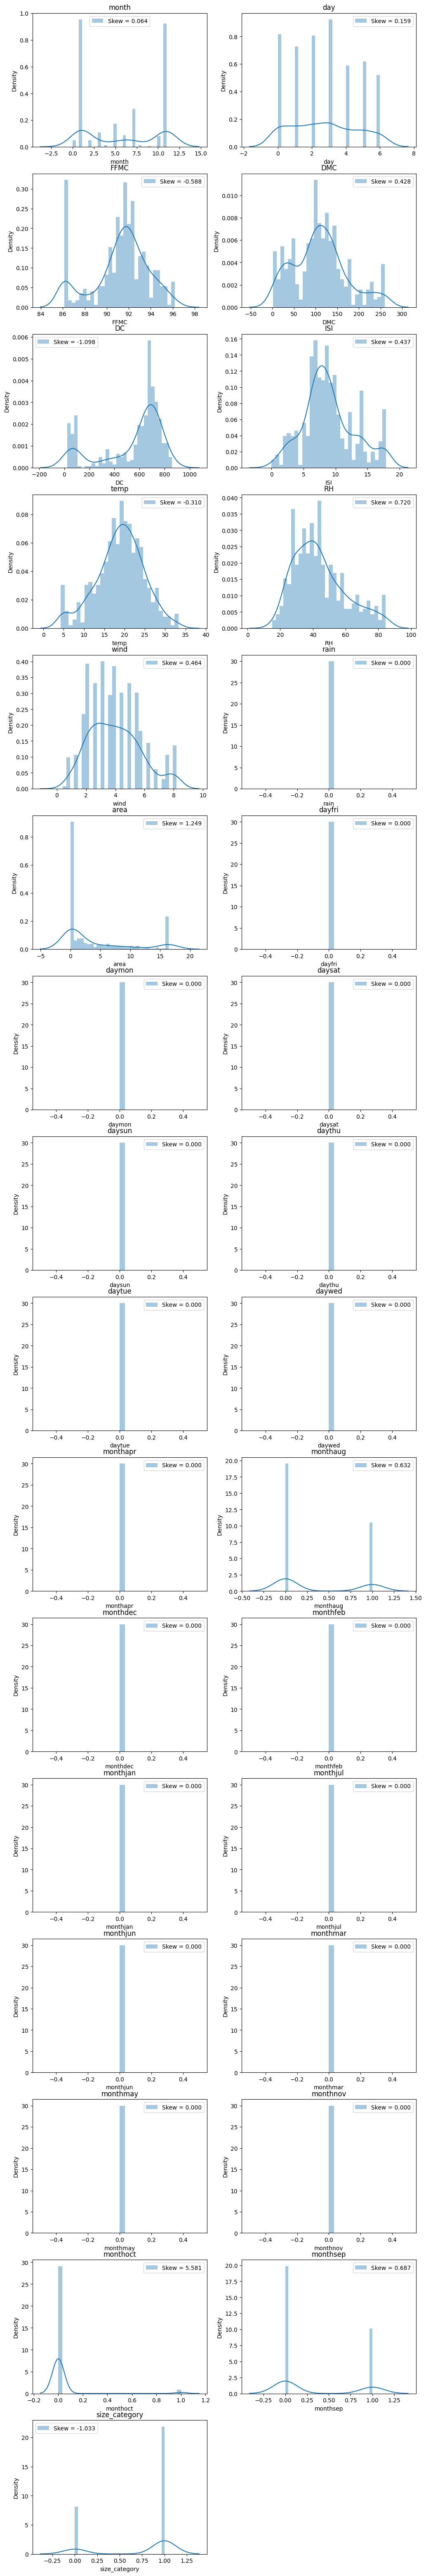

In [19]:
# distribution plots
subplots_per_row = 2
num_rows = (len(new_data.columns) + subplots_per_row - 1) // subplots_per_row
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(new_data.columns):
    ax = axes[i]
    skew = new_data[column].skew()
    sns.distplot(new_data[column], kde= True, label='Skew = %.3f' %(skew), bins=30, ax=ax)
    ax.legend(loc='best')
    ax.set_title(column)
    
# Hide any remaining empty subplots
for i in range(len(new_data.columns), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


### Histogram & Probability Plot (Q-Q plot)

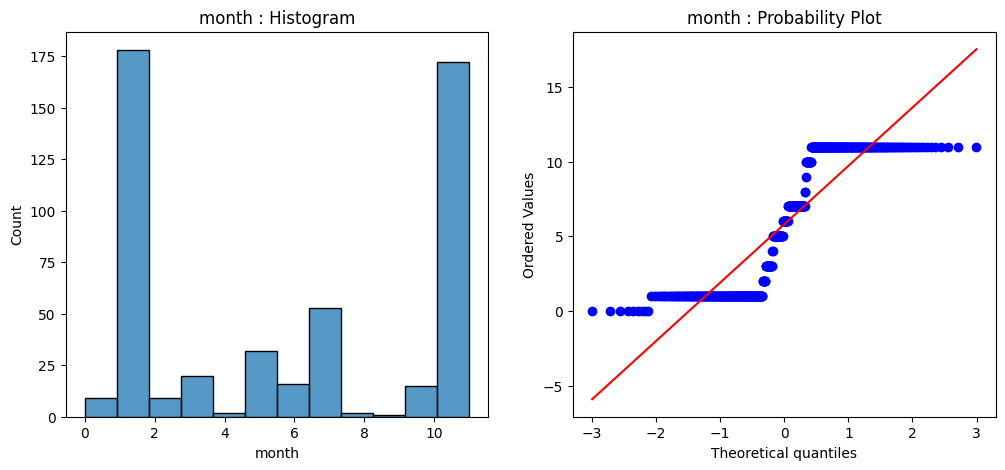

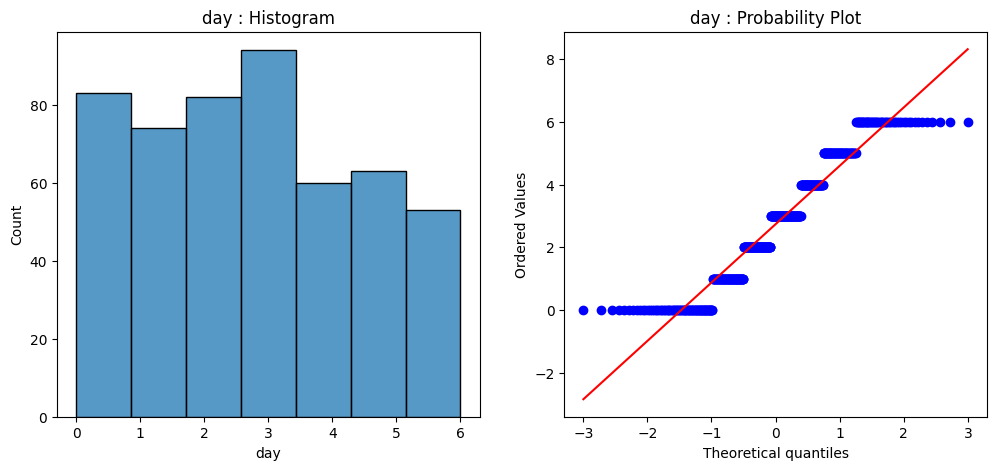

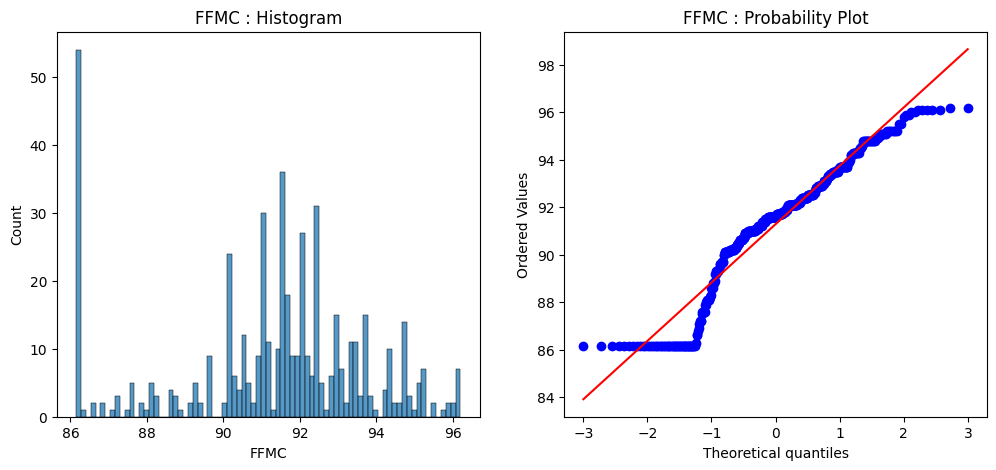

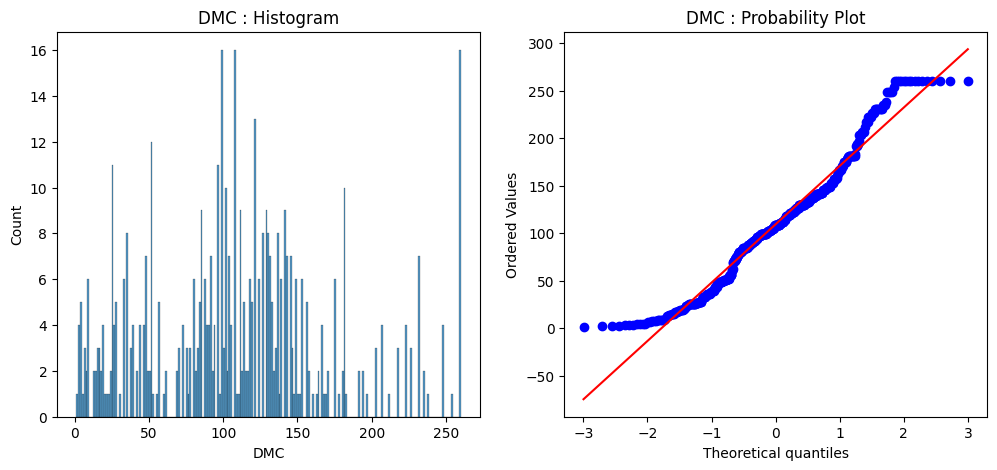

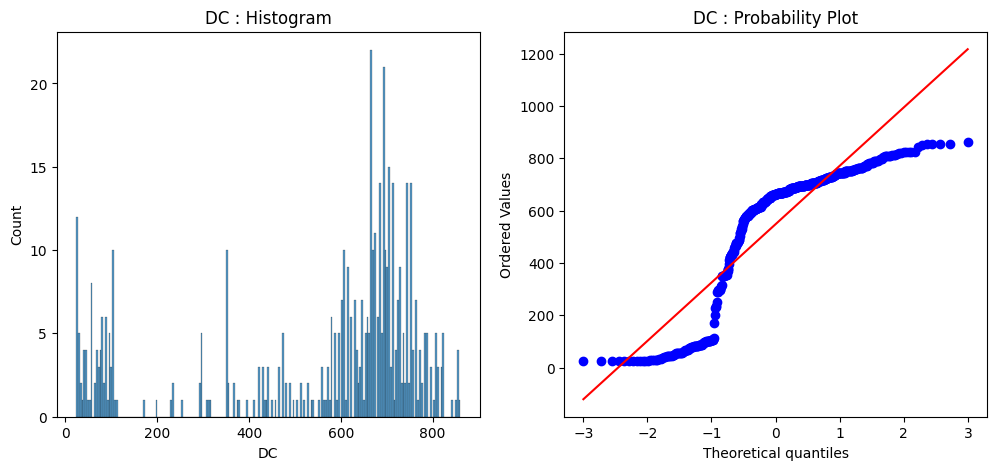

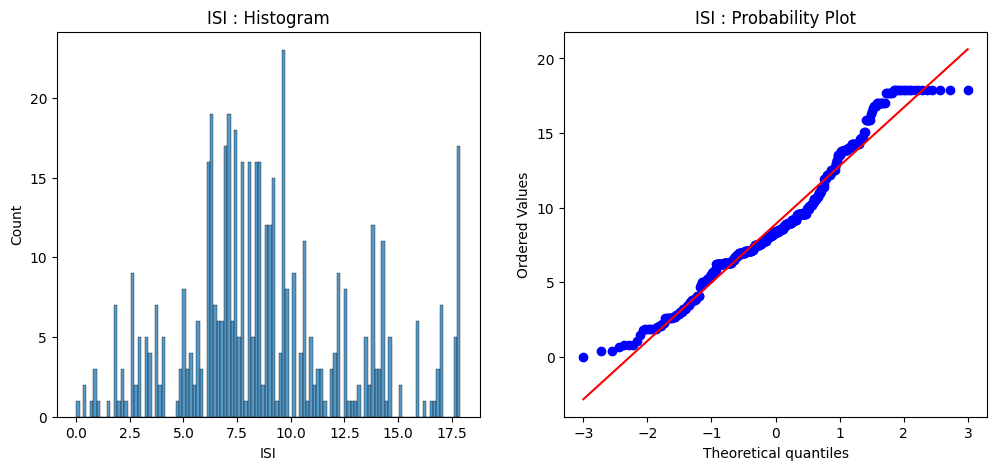

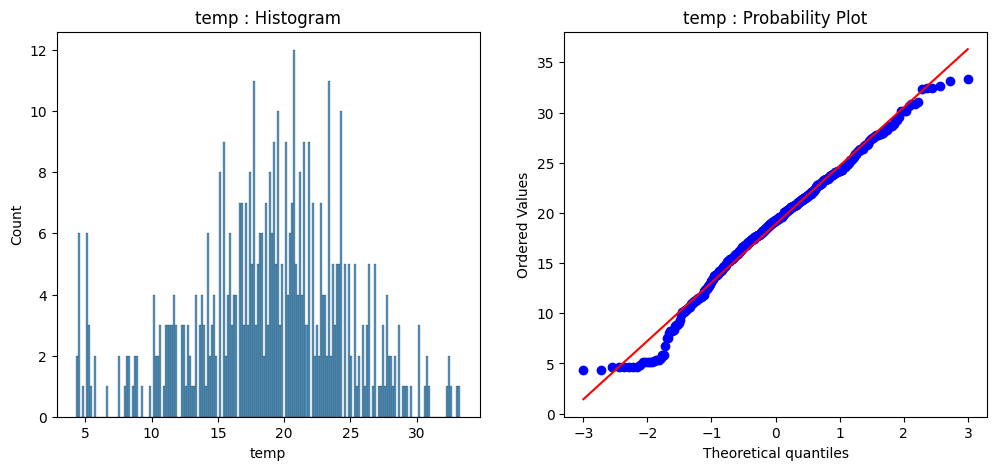

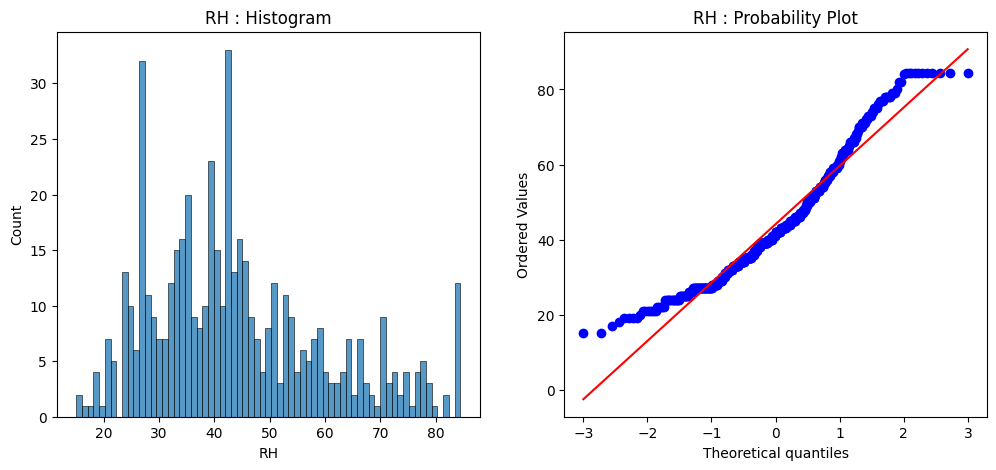

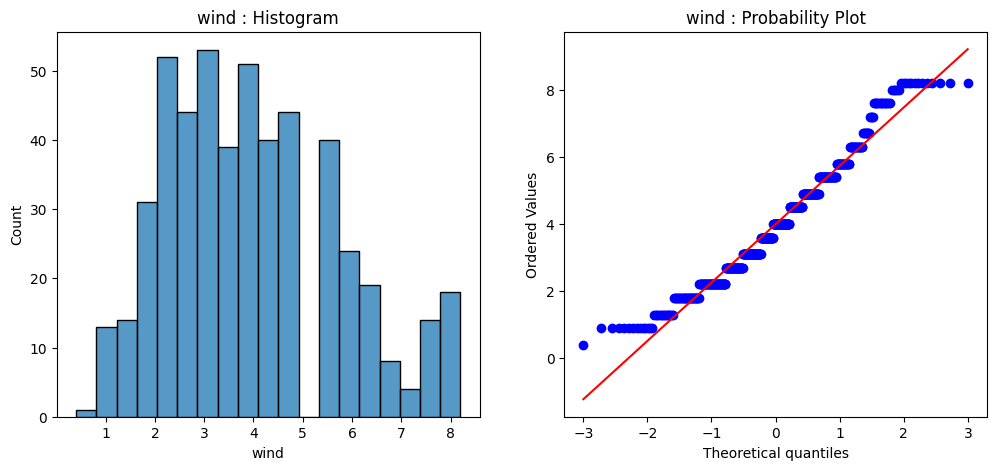

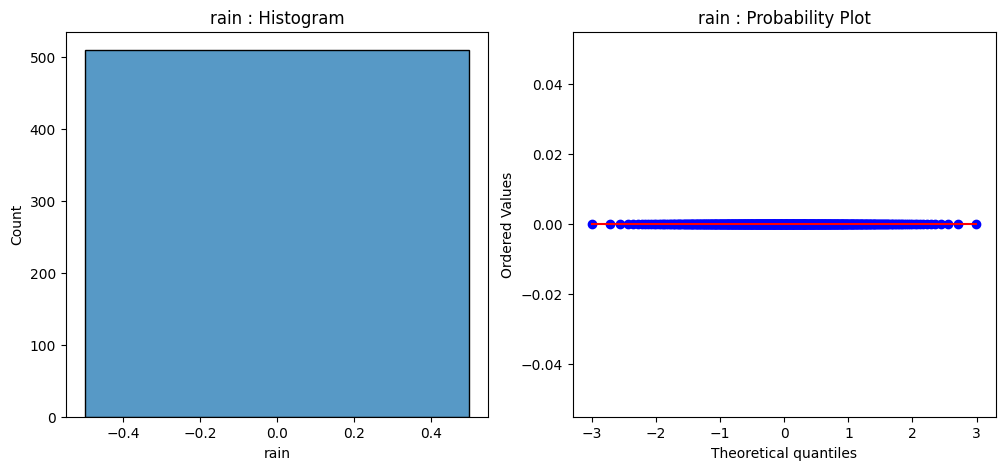

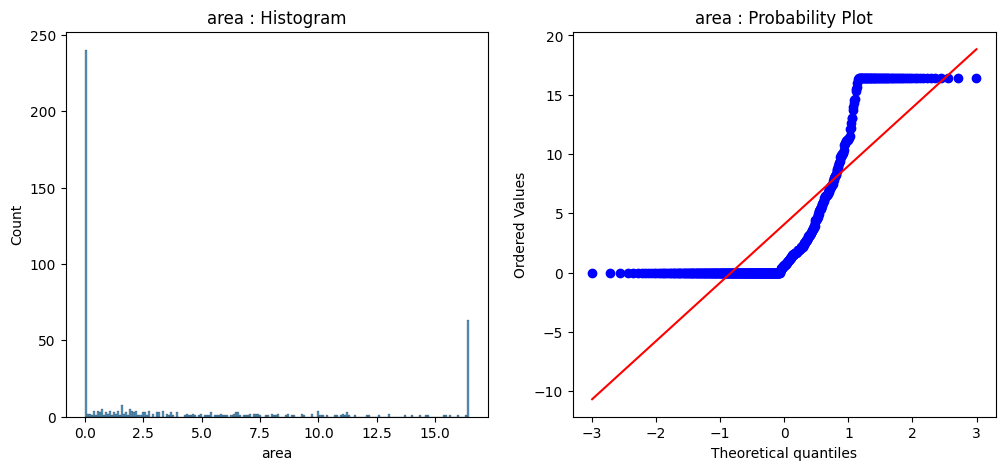

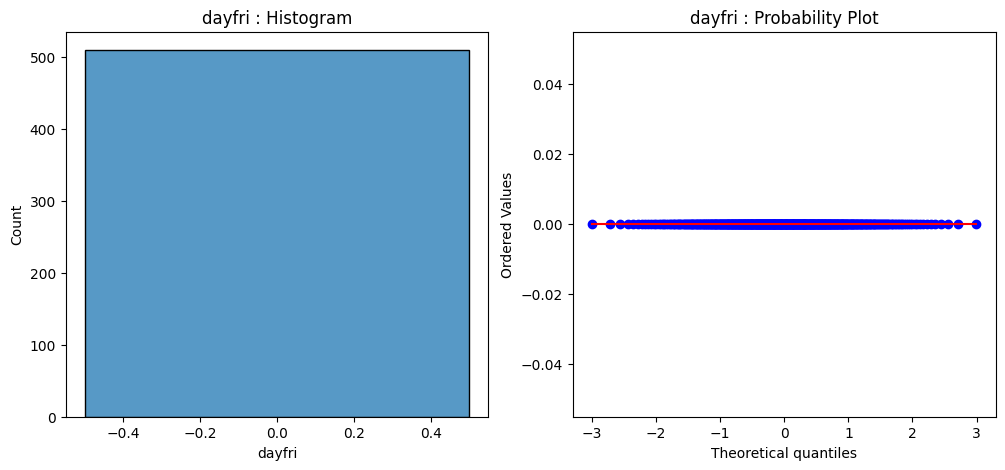

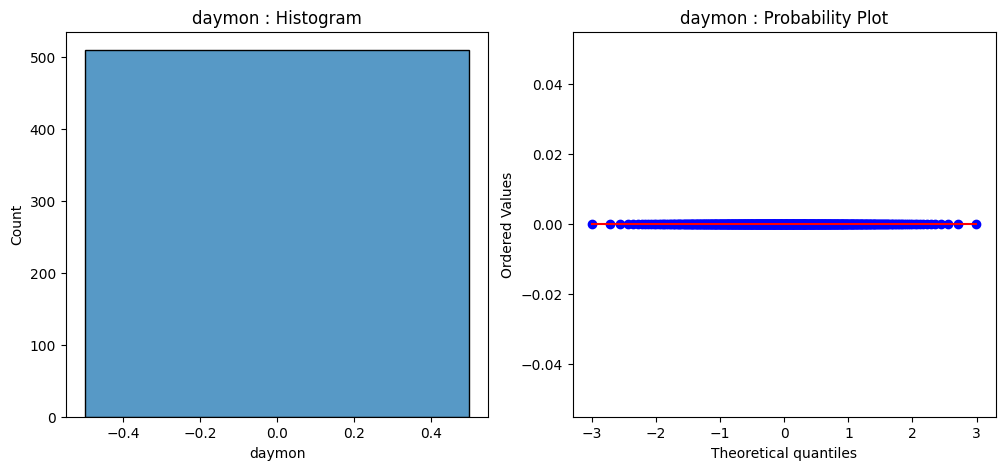

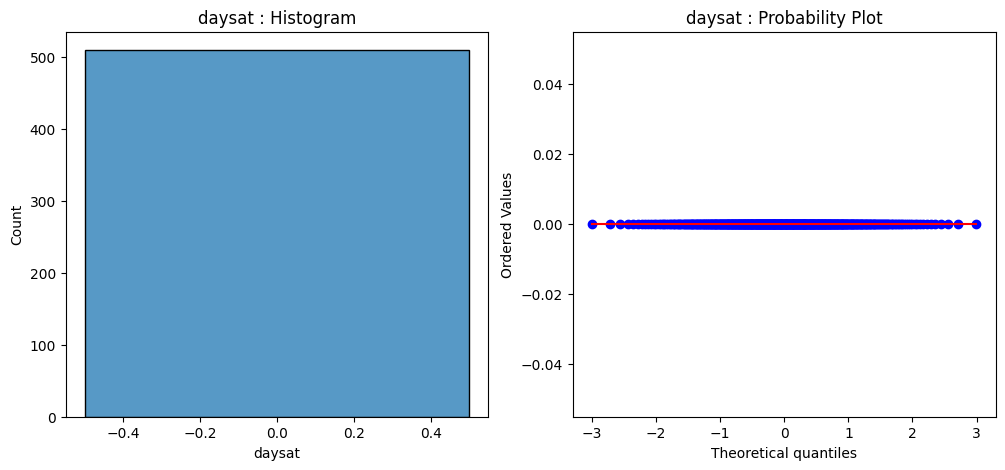

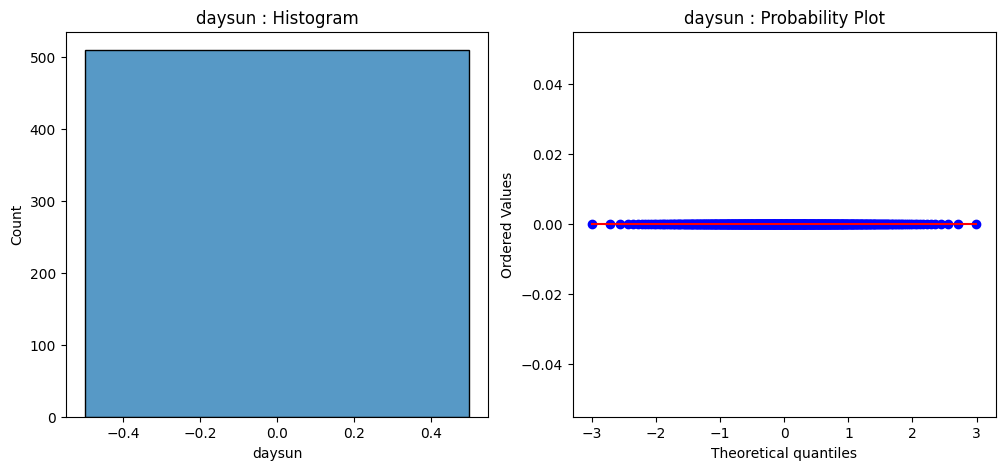

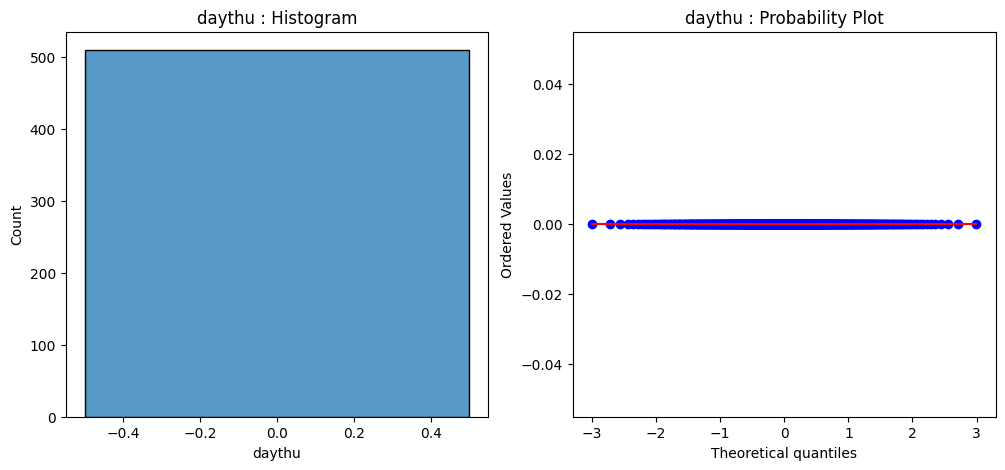

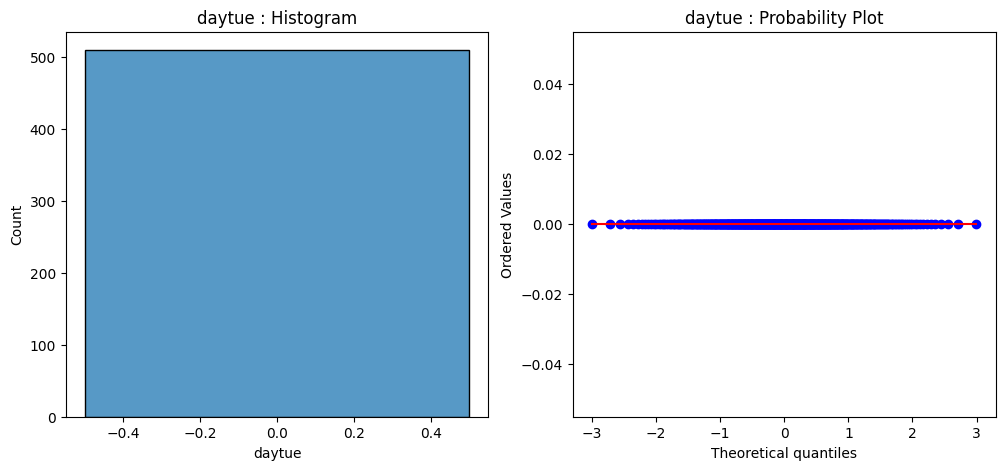

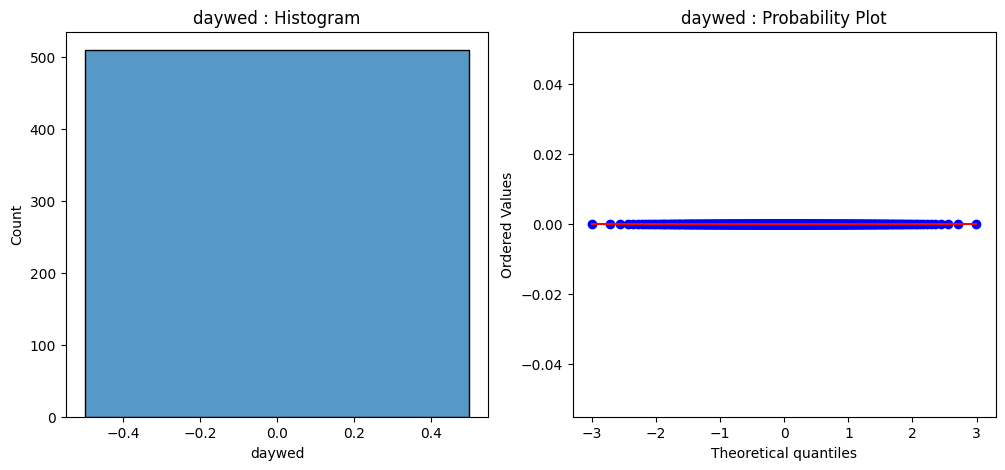

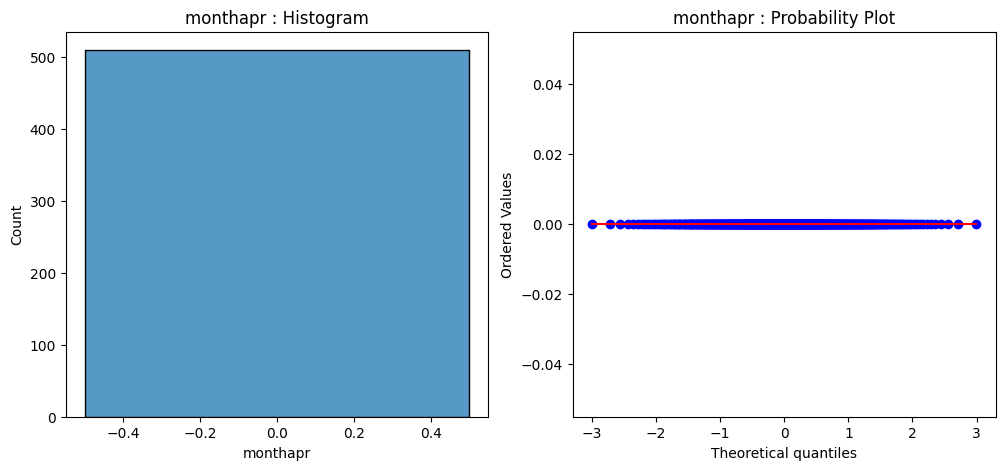

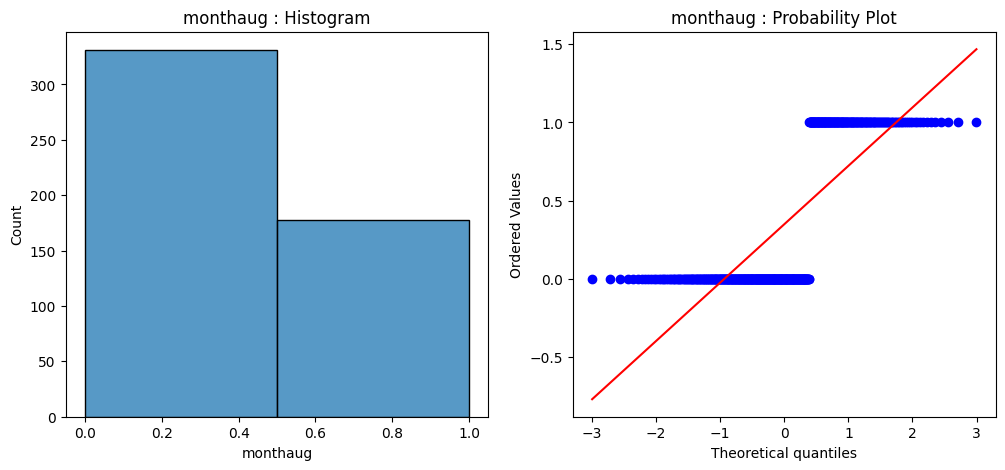

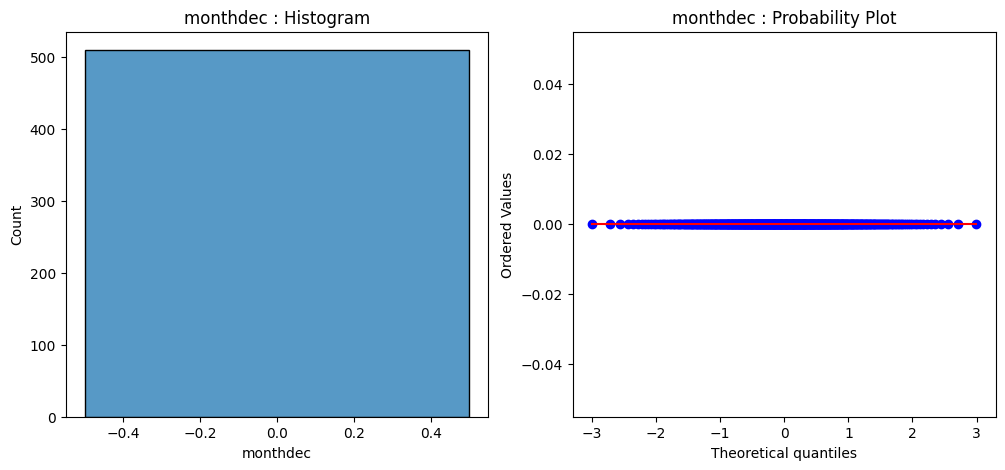

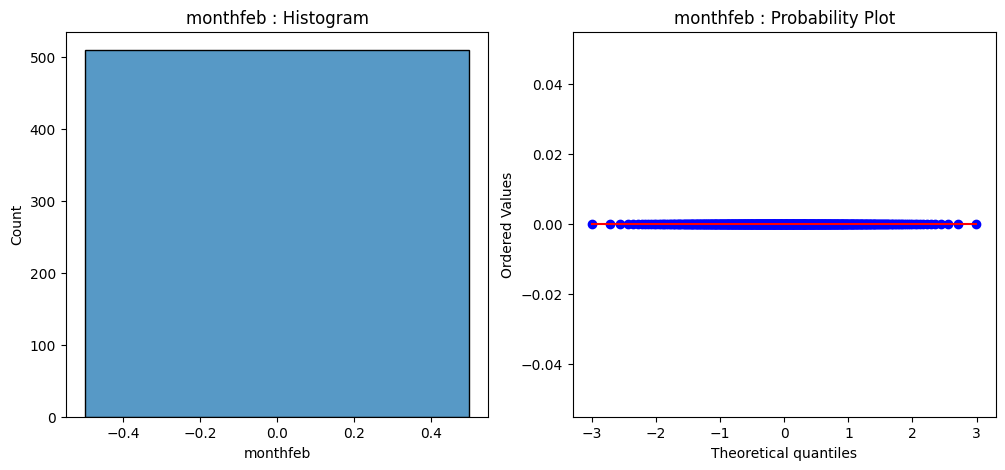

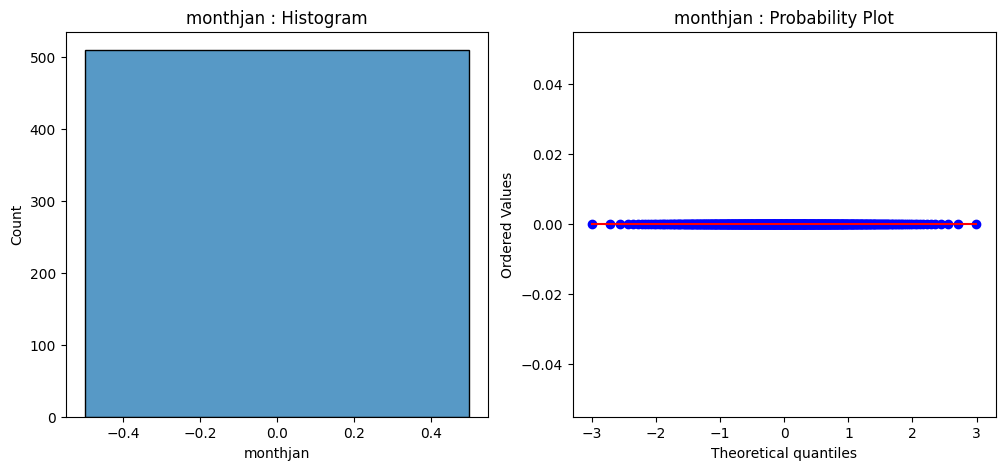

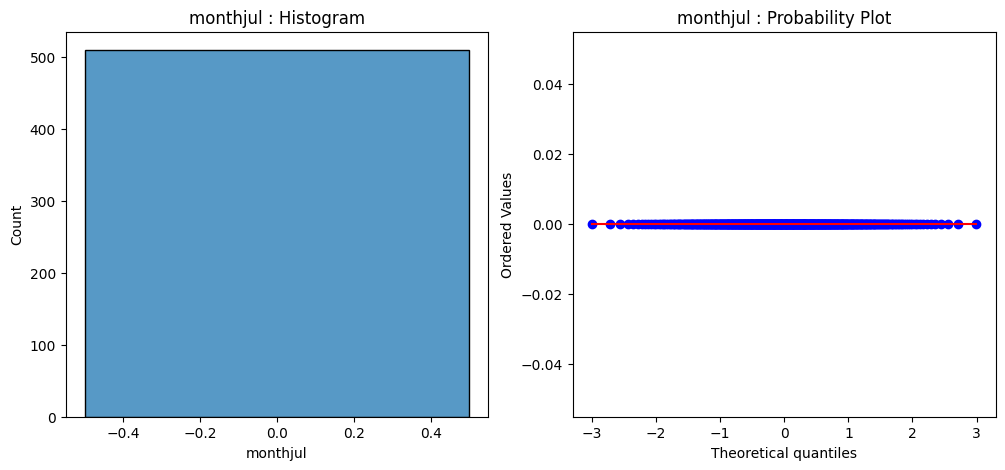

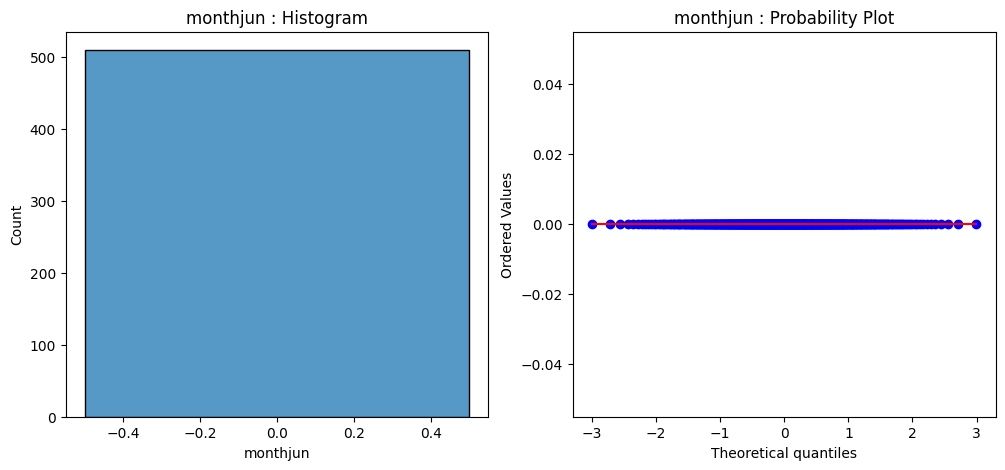

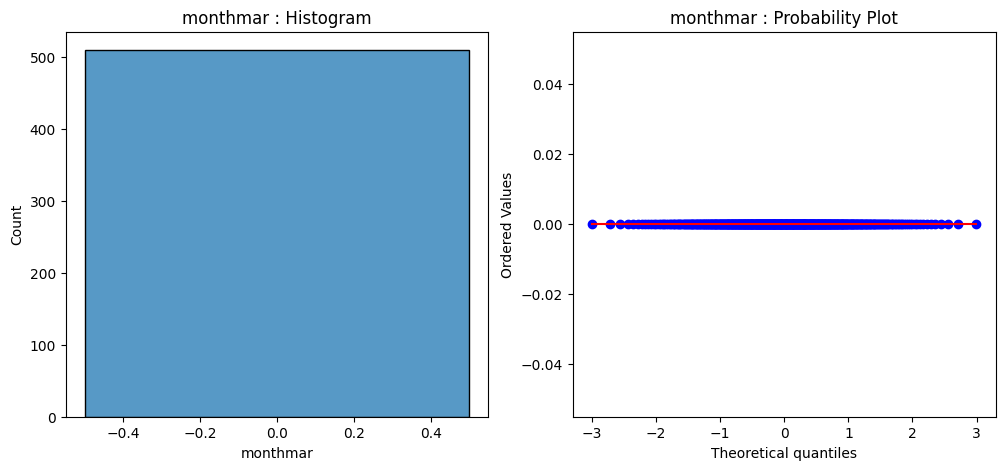

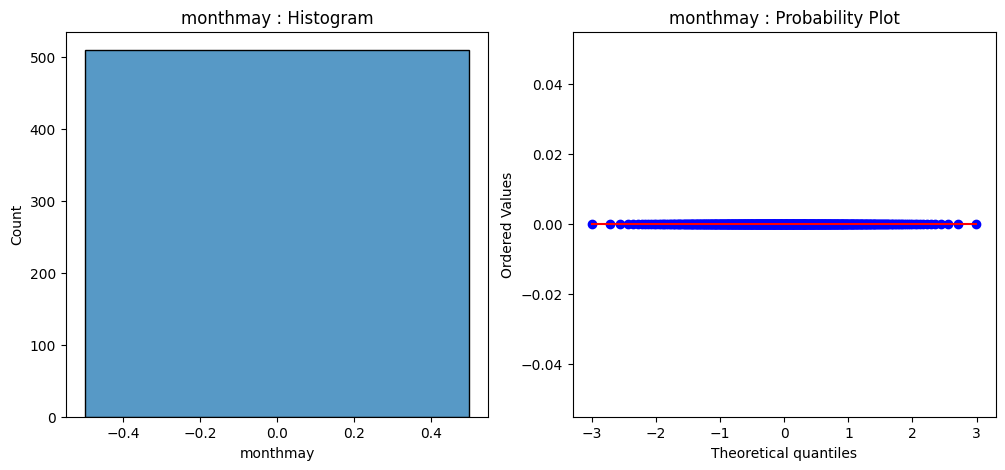

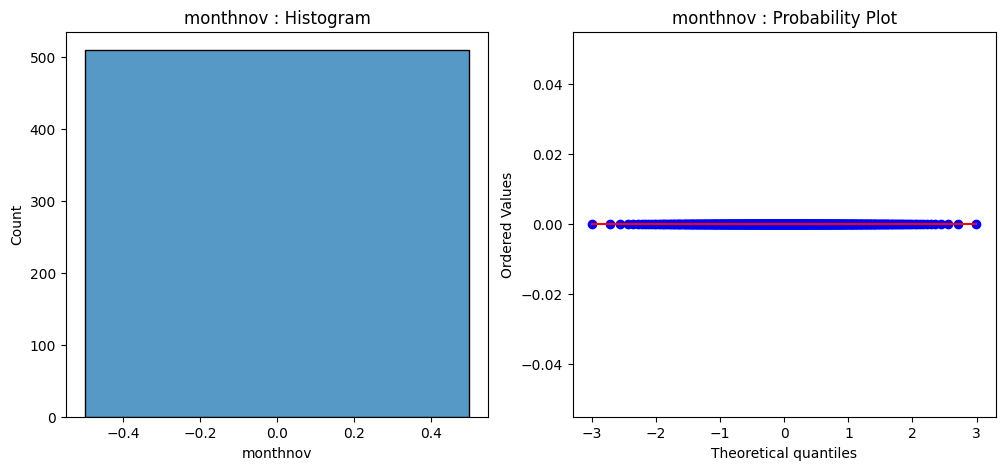

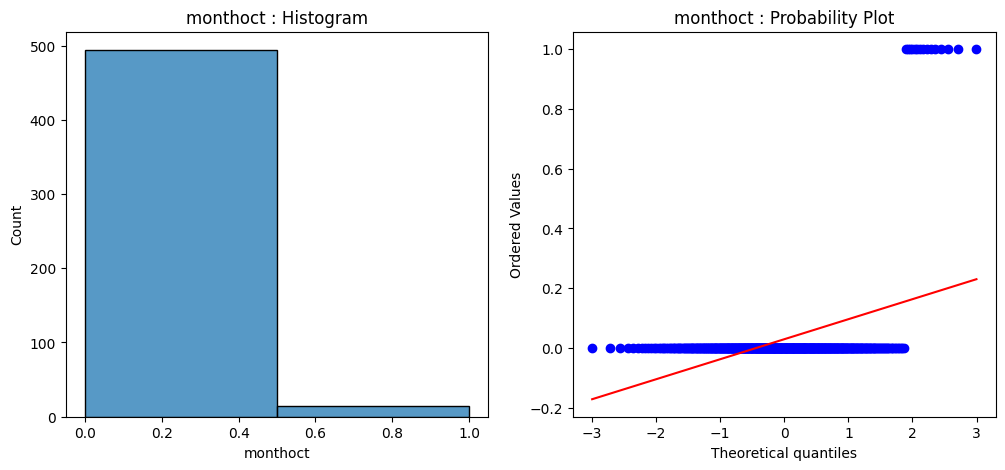

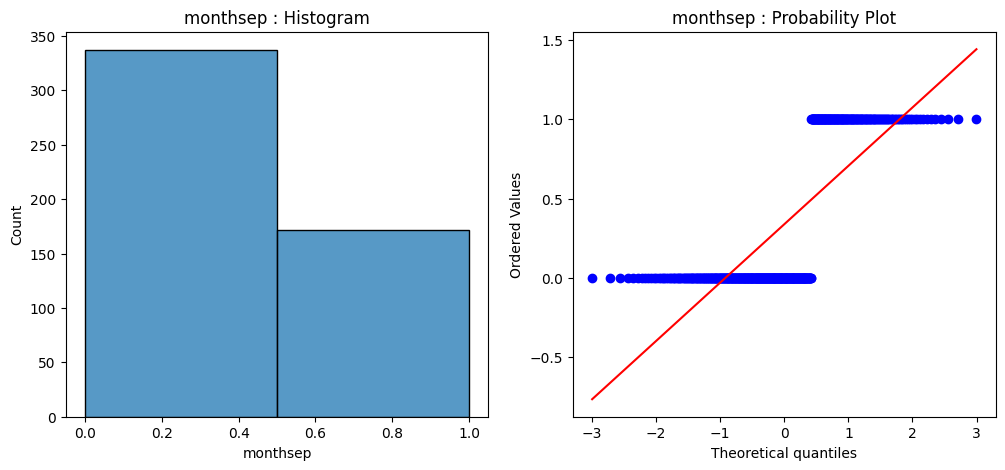

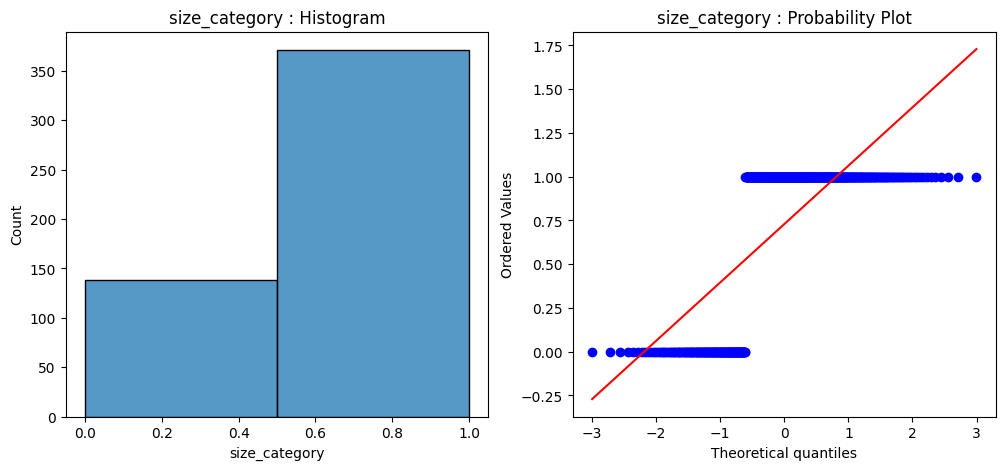

In [20]:
# Histogram & Probability Plot (Q-Q plot)
import pylab
import scipy.stats as stat

def plot_data(df, feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    # sns.barplot(x = df[feature].value_counts().index.tolist(), y = df[feature].value_counts().tolist())
    sns.histplot(df[feature], bins=len(df[feature].value_counts()))
    # df[feature].hist()
    plt.title(f'{feature} : Histogram')
    
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'{feature} : Probability Plot')

# Iterate through all columns
for column in new_data.columns:
    plot_data(new_data, column)
    plt.show()


# Model Building  & Testing

# Classification - size_category

In [21]:
X=new_data.drop(['size_category'],axis=1)   # Outlier treated data
y = new_data[['size_category']]
X

month  day   FFMC    DMC     DC   ISI  temp    RH  wind  rain  ...  \
0        7  0.0  86.20   26.2   94.3   5.1   8.2  51.0   6.7   0.0  ...   
1       10  5.0  90.60   35.4  669.1   6.7  18.0  33.0   0.9   0.0  ...   
2       10  2.0  90.60   43.7  686.9   6.7  14.6  33.0   1.3   0.0  ...   
3        7  0.0  91.70   33.3   77.5   9.0   8.3  84.5   4.0   0.0  ...   
4        7  3.0  89.30   51.3  102.2   9.6  11.4  84.5   1.8   0.0  ...   
..     ...  ...    ...    ...    ...   ...   ...   ...   ...   ...  ...   
512      1  3.0  86.15   56.7  665.6   1.9  27.8  32.0   2.7   0.0  ...   
513      1  3.0  86.15   56.7  665.6   1.9  21.9  71.0   5.8   0.0  ...   
514      1  3.0  86.15   56.7  665.6   1.9  21.2  70.0   6.7   0.0  ...   
515      1  2.0  94.40  146.0  614.7  11.3  25.6  42.0   4.0   0.0  ...   
516      9  5.0  86.15    3.0  106.7   1.1  11.8  31.0   4.5   0.0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         0         0         0  

[509 rows x 30 columns]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (356, 30)
Shape of X_test:  (153, 30)
Shape of y_train:  (356, 1)
Shape of y_test (153, 1)


In [23]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = SVC()
param_grid = [{'kernel':['linear', 'rbf'], 'gamma':[0.5,0.1,0.01], 'C':[10,0.1,0.001,0.0001]}]
gsv = RandomizedSearchCV(clf, param_grid,cv = 10, verbose=300)
gsv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=10, gamma=0.1, kernel=linear............................
[CV 1/10; 1/10] END C=10, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 2/10; 1/10] START C=10, gamma=0.1, kernel=linear............................
[CV 2/10; 1/10] END C=10, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 3/10; 1/10] START C=10, gamma=0.1, kernel=linear............................
[CV 3/10; 1/10] END C=10, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 4/10; 1/10] START C=10, gamma=0.1, kernel=linear............................
[CV 4/10; 1/10] END C=10, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10; 1/10] START C=10, gamma=0.1, kernel=linear............................
[CV 5/10; 1/10] END C=10, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 6/10; 1/10] START C=10, gamma=0.1, kernel=linear............................
[CV 6/10; 1/10] END C=10, gamma

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=300)

In [24]:
gsv.best_score_, gsv.best_params_

(0.9831746031746033, {'kernel': 'linear', 'gamma': 0.01, 'C': 0.1})

In [25]:
y_pred = gsv.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [26]:
# Evaluate the accuracy of the model
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# acc = np.mean(y_pred==y_test)
# acc

Accuracy: 0.9803921568627451


Confusion Matrix:

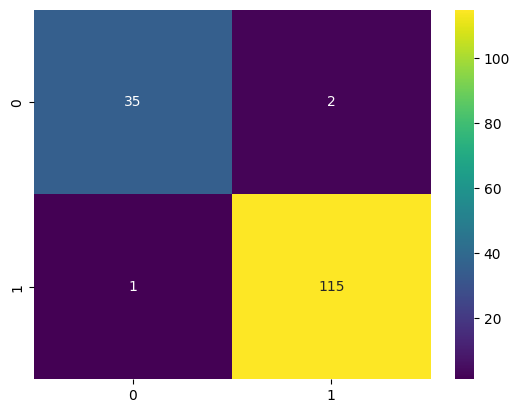

In [27]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

compare the actual with the predicted:

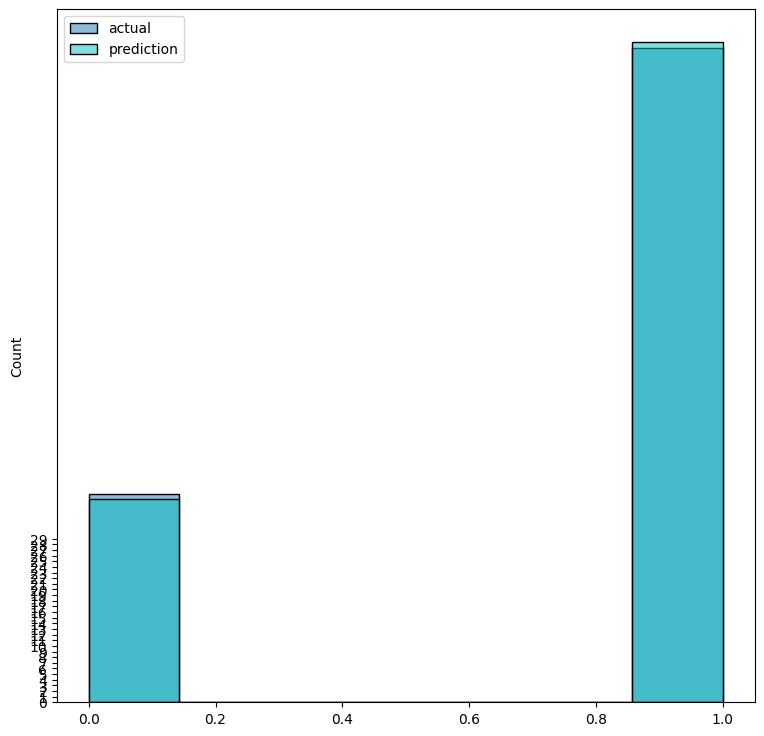

In [28]:
plt.rcParams['figure.figsize'] = (9, 9)

fig, ax = plt.subplots()

sns.histplot(y_test, color='m', alpha=0.5, label='actual', bins=7, ax=ax)
sns.histplot(y_pred, color='c', alpha=0.5, label='prediction', bins=7, ax=ax)

ax.yaxis.set_ticks(range(0, 30))
ax.legend(loc='best')

plt.show()


Precision, Recall, and F1-Score:

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

Precision: 0.980322328361544, Recall: 0.9803921568627451, F1-Score: 0.9802999334838881


Receiver Operating Characteristic (ROC) Curve: Binary Classification problem

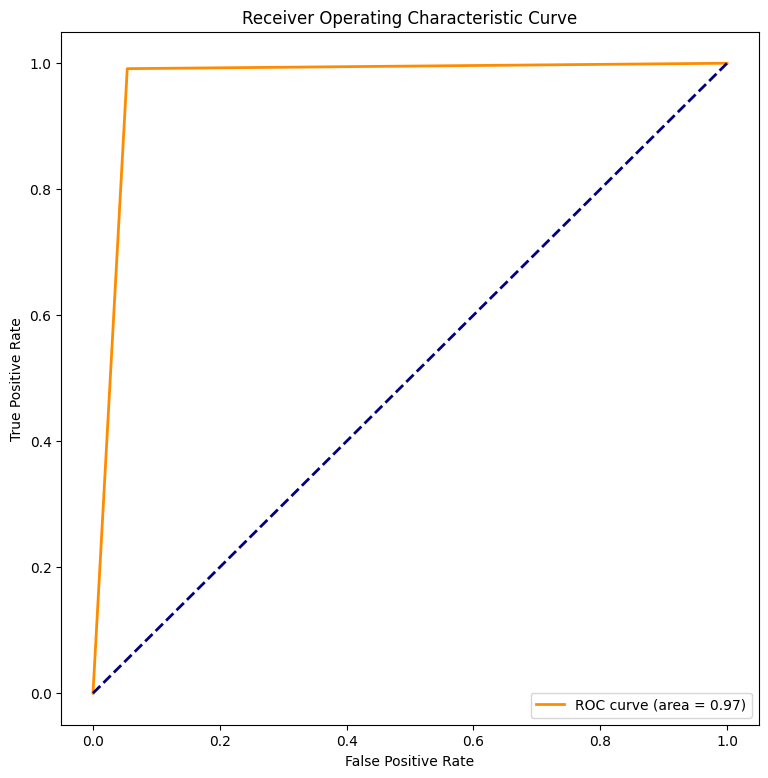

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


Cross-Validation:

In [31]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(y_pred, X_train, y_train, cv=5)  # 5-fold cross-validation
# print("Cross-Validation Scores:", scores)
# print("Mean Accuracy:", scores.mean())

## Using linear kernel

In [32]:
clf1 = SVC(kernel = 'linear', C = 10, gamma = 0.5)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
acc = accuracy_score(y_pred, y_test)
acc

0.9934640522875817

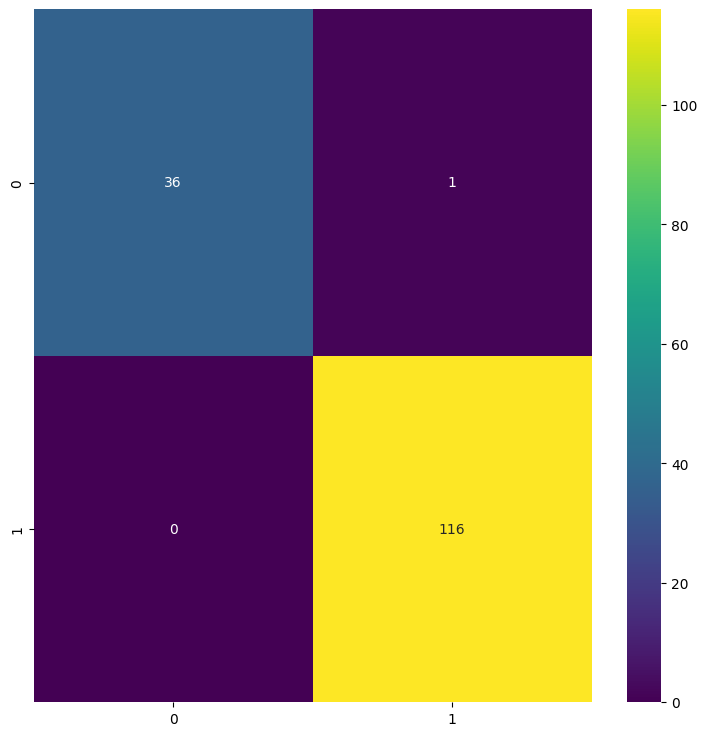

In [33]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

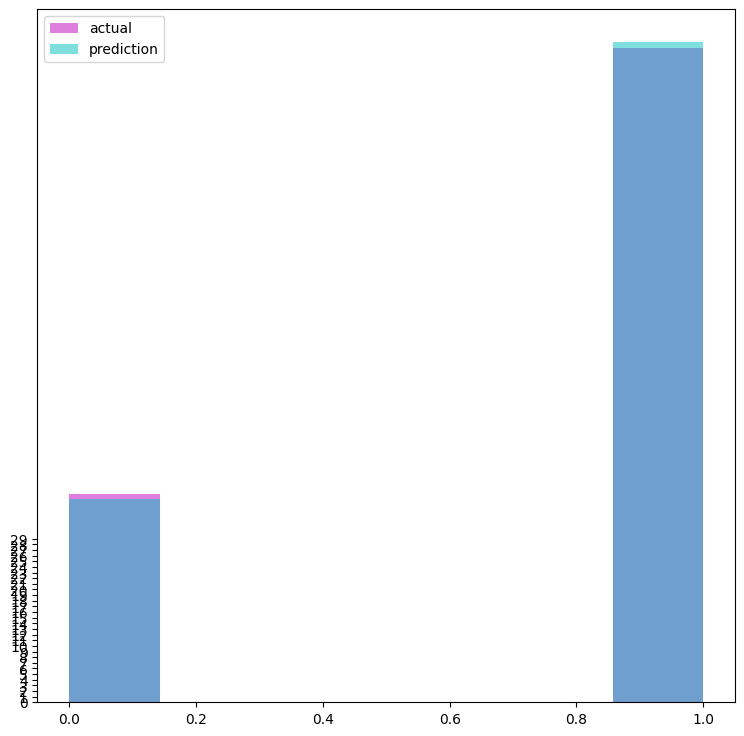

In [34]:
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

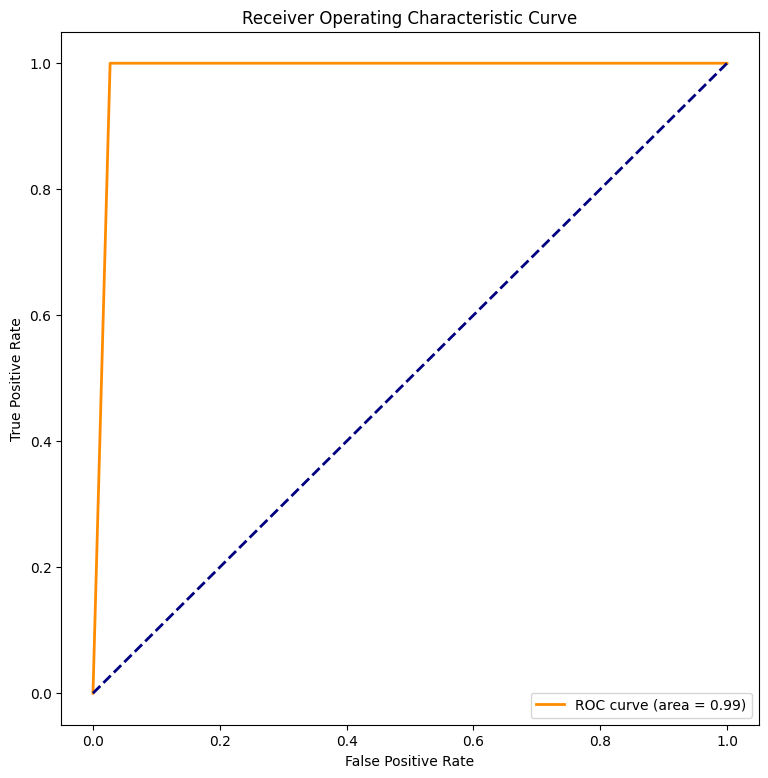

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


## Using ploy kernel

In [36]:
clf2 = SVC(kernel='poly')
clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy=',acc)


Accuracy= 75.81699346405229


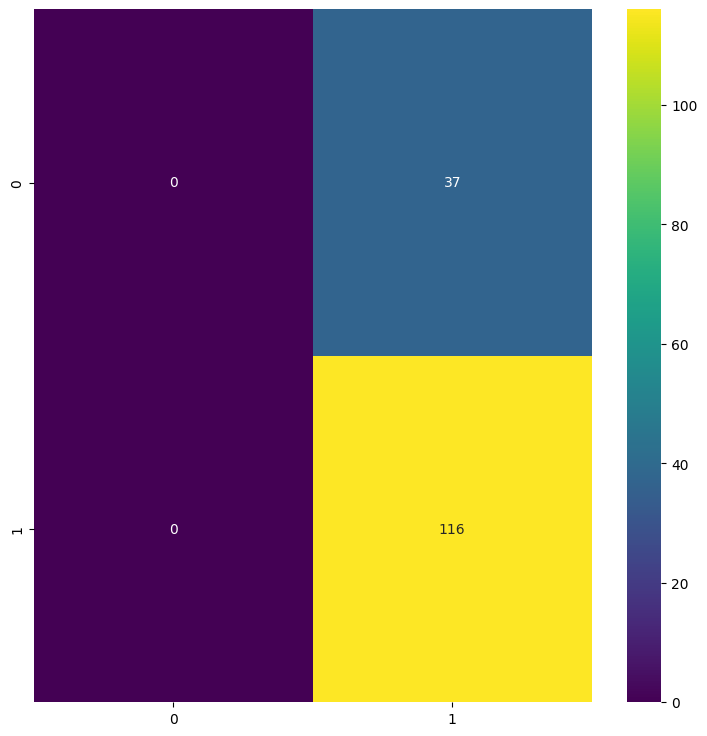

In [37]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

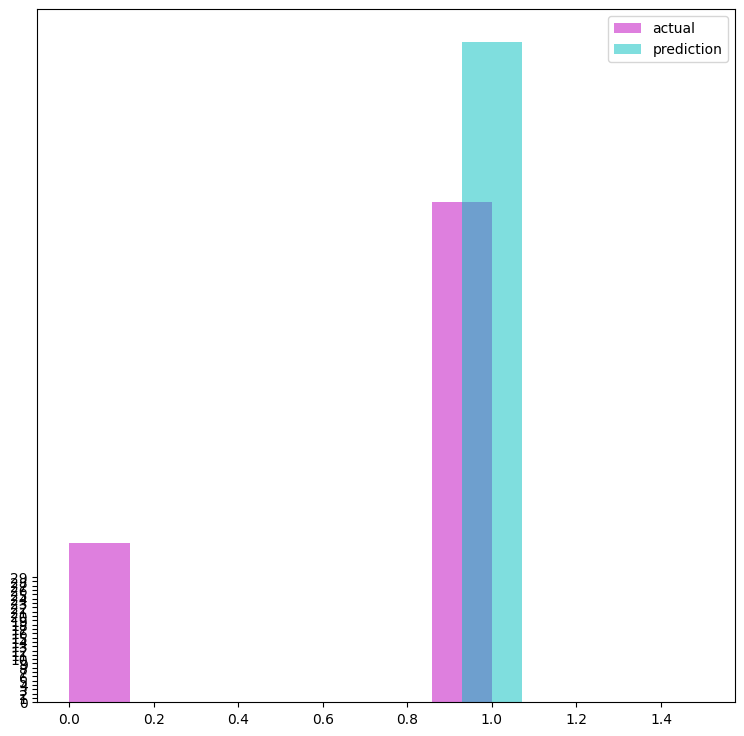

In [38]:
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

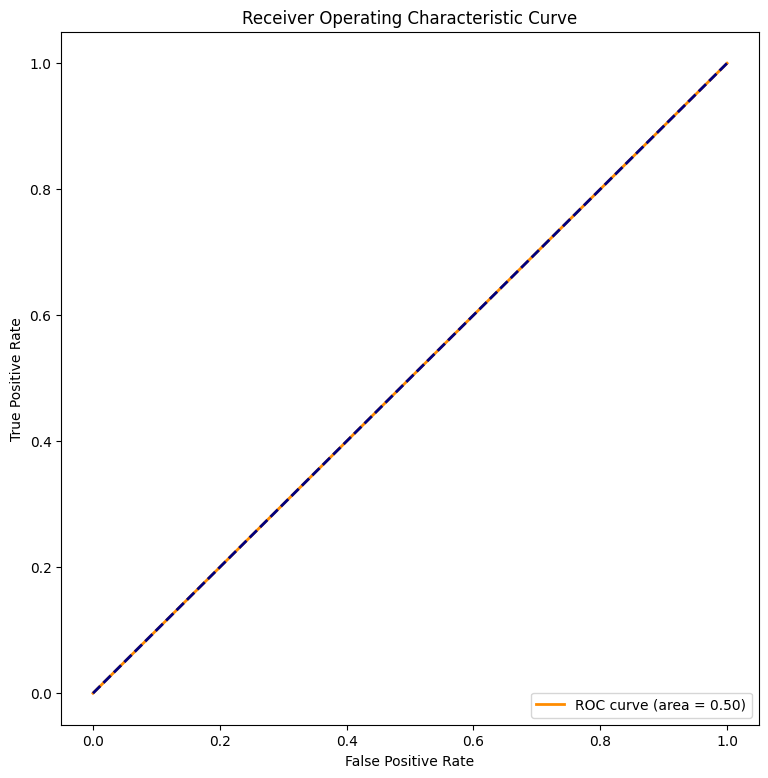

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()
